In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd

In [2]:
def get_max_length(smiles: str) -> float:
    mol = Chem.MolFromSmiles(smiles)
    # Add hydrogen atoms to the molecule 
    mol = Chem.AddHs(mol)
    # Generate 3D coordinates
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())

    # Optimize the geometry
    AllChem.UFFOptimizeMolecule(mol)

    # Calculate the maximum distance between any two atoms
    coords = mol.GetConformer().GetPositions()

    return np.max([np.linalg.norm(coords[i]- coords[j]) for i in range(len(coords)) for j in range(i+1, len(coords))])


In [3]:
# load predictions for QMOF
tp = pd.read_csv("T_P_qmof.csv", index_col=0)
gm = pd.read_csv("ges_mol_qmof.csv", index_col=0)
no = pd.read_csv("no_pred_qmof.csv", index_col=0)

In [4]:
len(tp),len(gm),len(no)

(1646, 539, 5278)

In [5]:
len(tp)+len(gm)+len(no)

7463

In [6]:
# load linker data for QMOF
data = pd.read_csv("../preprocessing/qmof/data/qmof_property_cell.csv", index_col=1)

In [15]:
tp_lengths = pd.DataFrame(columns=["max_len"])
bed_count = 0
for name in tp.index:
    smi = data["smilesLinkers"].loc[name]
    ss = smi.split(",") # split 'linker1,linker2' to ['linker1', 'linker2']
    curr_lengths = []

    for s in ss:
        try:
            curr_len = get_max_length(s)
            curr_lengths.append(curr_len)
        except Exception:
            bed_count += 1
            
            print(s)
        
    if curr_lengths:
        tp_lengths.loc[name] = [max(curr_lengths)]

[23:36:26] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:36:26] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:36:26] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:36:26] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:36:26] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9


[O-]C(=O)c1ccc2c(c1)c[n-][nH]2


[23:36:27] Explicit valence for atom # 3 N, 4, is greater than permitted


COC1=[N]=C(OC)C(=C([C]1OC)c1c(I)c(I)c(c(c1I)I)C1=C(OC)C(=[N]=C([C]1OC)OC)OC)OC


[23:36:28] Explicit valence for atom # 8 N, 4, is greater than permitted


N#Cc1c(C#N)c2C(=[N]=C(c3c2c2c1C(=[N]=C(c2c(c3C#N)C#N)O)O)O)O


[23:36:29] Explicit valence for atom # 12 N, 4, is greater than permitted


OC(=O)c1c(C(=O)O)c(C2=NC3=[N]=C(N=C4N3C(=NC(=N4)c3c(C(=O)O)c(C(=O)O)c(c(c3C(=O)O)C(=O)O)C(=O)[O-])[N]2)c2c(C(=O)O)c(C(=O)O)c(c(c2C(=O)O)C(=O)O)C(=O)[O-])c(c(c1C(=O)[O-])C(=O)O)C(=O)O


[23:36:31] Explicit valence for atom # 14 N, 4, is greater than permitted


[O-]C(=O)c1ccc2c(c1)ccc(c2)C1=[N]=C2N=C([N]1)c1ccc3c(c1)ccc(-c1c(-c4cc5ccc2cc5cc4)cc2-c4ccc5c(c4)ccc(c5)C4=NC(=[N]=C([N]4)c4ccc5c(c4)ccc(c5)C(=O)[O-])c4cc5ccc(-c2c1)cc5cc4)c3


[23:36:32] Explicit valence for atom # 3 N, 4, is greater than permitted


Br[N]C(=[NH2])C(=N)Br


[23:36:32] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:36:32] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:36:32] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:36:32] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:36:32] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:36:32] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:36:32] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:36:32] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:36:34] Explicit valence for atom # 2 N, 4, is greater than permitted


NC1=[N]=C(N=N1)N


[23:36:35] Explicit valence for atom # 13 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1F)C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2ccc(c(c2)F)C(=O)[O-])[N]1)c1ccc(c(c1)F)C(=O)[O-]


[23:36:35] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:36:35] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:36:35] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:36:35] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:36:36] Explicit valence for atom # 1 N, 4, is greater than permitted


C[NH]=C(C#CC(=O)[O-])[CH]C#CC(=O)[O-]


[23:36:38] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:36:38] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:36:38] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:36:38] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:36:38] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:36:38] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:36:38] Explicit valence for atom # 4 N, 4, is greater than permitted


NC1=NC(=[N]=C([N]1)N)N


[23:36:39] Can't kekulize mol.  Unkekulized atoms: 9 10 14
[23:36:39] Explicit valence for atom # 4 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1)c1c(C)[n-][nH]c1C
CCOC1=[N]=C(OCC)C(=C([C]1OCC)c1c(OCC)cc(cc1OCC)c1ccncc1)OCC


[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:36:39] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:36:42] Explicit valence for atom # 6 N, 4, is greater than permitted


Nc1c(C2=NC(=[N]=C([N]2)c2c(N)c(N)c(c(c2N)N)C(=O)[O-])c2c(N)c(N)c(c(c2N)N)C(=O)[O-])c(N)c(c(c1N)C(=O)[O-])N


[23:36:42] Explicit valence for atom # 5 N, 4, is greater than permitted


CCCOC1=[N]=C(C=C([CH]1)C#Cc1ccncc1)OCCC


[23:36:45] UFFTYPER: Warning: hybridization set to SP3 for atom 4
[23:36:45] UFFTYPER: Warning: hybridization set to SP3 for atom 4
[23:36:46] Explicit valence for atom # 4 N, 4, is greater than permitted


CCOC1=[N]=C(OCC)C(=C([C]1OCC)c1c(OCC)c(OCC)c(c(c1OCC)OCC)C1=C(OCC)C(=[N]=C([C]1OCC)OCC)OCC)OCC


[23:36:47] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:36:47] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:36:48] Explicit valence for atom # 14 N, 4, is greater than permitted


[O-]C(=O)c1c(C)cc(cc1C)C1=NC(=[N]=C([N]1)c1cc(C)c(c(c1)C)C(=O)[O-])c1cc(C)c(c(c1)C)C(=O)[O-]


[23:36:49] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:36:49] Explicit valence for atom # 1 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C1=[N]=C(N=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]
C[NH]=C(C(=[NH]C)C#N)C#N


[23:36:50] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:36:50] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:36:50] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:36:50] Explicit valence for atom # 12 N, 4, is greater than permitted


N1=C[C](C=N1)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C1=C[N]N=C1)c1ccc(cc1)C1=CN=N[CH]1
N1=C[C](C=N1)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)[C]1C=NN=C1)c1ccc(cc1)C1=C[N]N=C1
N1=C[C](C=N1)c1ccc(cc1)C1=[N]=C(N=C([N]1)c1ccc(cc1)C1=C[N]N=C1)c1ccc(cc1)[C]1C=NN=C1
N1=C[C](C=N1)c1ccc(cc1)C1=[N]=C([N]C(=N1)c1ccc(cc1)C1=C[N]N=C1)c1ccc(cc1)C1=C[N]N=C1


[23:36:50] Explicit valence for atom # 16 N, 4, is greater than permitted


CNc1c(c(NC)c(c(c1NC)C1=C(O)C(=[N]=C([C]1O)O)O)NC)[C]1[C](O)C(=[N]=C([C]1O)O)O


[23:36:51] Explicit valence for atom # 9 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[23:36:52] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:36:52] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:36:52] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:36:52] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:36:52] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:36:52] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:36:52] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:36:52] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:36:52] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:36:52] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:36:52] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:36:52] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:36:56] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:36:56] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:36:56] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:36:56] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:36:58] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:36:58] UFFTYPER: Unrecognized atom type: S_5+4 (

[O-]C(=O)c1[nH][n-]c(c1Br)C(=O)[O-]


[23:36:59] Can't kekulize mol.  Unkekulized atoms: 3 4 5


CCCc1c(c[n-]n1c1ccc2c(c1)c(F)cc(c2)[C]1C=NN=C1F)c1ccc(cc1)c1cc(F)c(c(c1)F)[C]1C=NN=C1


[23:37:00] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:37:00] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:37:00] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:37:00] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:37:00] Explicit valence for atom # 14 N, 4, is greater than permitted


N1=CC(=C[N]1)C1=NC(=[N]=C([N]1)C1=C[N]N=C1)C1=C[N]N=C1
N1=C[C](C=N1)C1=NC(=[N]=C([N]1)C1=C[N]N=C1)C1=C[N]N=C1
N1=C[C](C=N1)C1=NC(=[N]=C([N]1)[C]1C=NN=C1)[C]1C=NN=C1
N1=NC=C([CH]1)C1=[N]=C(N=C([N]1)C1=C[N]N=C1)[C]1C=NN=C1
[O-]C(=O)c1c(N)cc(cc1N)C1=NC(=[N]=C([N]1)c1cc(N)c(c(c1)N)C(=O)[O-])c1cc(N)c(c(c1)N)C(=O)[O-]


[23:37:00] Explicit valence for atom # 9 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[23:37:02] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:37:02] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:37:02] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:37:02] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:37:05] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:05] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:06] Explicit valence for atom # 9 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[23:37:07] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:07] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:37:07] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:07] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:37:09] Explicit valence for atom # 14 N, 4, is greater than permitted


[O-]C(=O)c1ccc2c(c1)ccc(c2)C1=[N]=C2N=C([N]1)c1ccc3c(c1)ccc(-c1c(-c4cc5ccc2cc5cc4)cc2-c4ccc5c(c4)ccc(c5)C4=NC(=[N]=C([N]4)c4ccc5c(c4)ccc(c5)C(=O)[O-])c4cc5ccc(-c2c1)cc5cc4)c3


[23:37:10] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:37:10] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:37:11] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:37:11] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:37:11] Explicit valence for atom # 16 N, 4, is greater than permitted


[O-]C(=O)C#CC12CCC(C(C1N)N)(C(C2N)([NH3])S([O])([O])[O])C#CC(=O)[O-]


[23:37:11] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:37:11] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:37:11] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:37:11] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:37:12] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:37:12] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:37:12] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (20)


[O-]C(=O)c1ccc(cc1Cl)C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2ccc(c(c2)Cl)C(=O)[O-])[N]1)c1ccc(c(c1)Cl)C(=O)[O-]


[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[23:37:13] UFFTYPER: Unrecognized atom type: S_5

[O-]C(=O)c1ccc(cc1)C1=C2C=CC3=[N]2[Zn]24n5c1ccc5C(=C1[N]2=C(C=C1)C(=c1n4c(=C3c2ccc(cc2)C(=O)O)cc1)c1ccc(cc1)C(=O)O)c1ccc(cc1)C(=O)[O-]
[O-]C(=O)c1ccc(cc1)C1=C2C=CC3=[N]2[Zn]24n5c1ccc5C(=C1[N]2=C(C=C1)C(=c1n4c(=C3c2ccc(cc2)C(=O)[O-])cc1)c1ccc(cc1)C(=O)O)c1ccc(cc1)C(=O)O
[O-]C(=O)c1ccc(cc1)C1=c2ccc3=C(C4=[N]5[Zn]6([N]7=C1C=CC7=C(c1ccc(cc1)C(=O)O)c1n6c(C(=C5C=C4)c4ccc(cc4)C(=O)O)cc1)n23)c1ccc(cc1)C(=O)[O-]


[23:37:14] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:37:14] Explicit valence for atom # 15 N, 4, is greater than permitted


n1ccc(cc1)C1=[N]=C(N=N1)c1ccncc1
O=N(=O)c1cc(ccc1C(=O)[O-])C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2ccc(c(c2)N(=O)=O)C(=O)[O-])[N]1)c1ccc(c(c1)N(=O)=O)C(=O)[O-]


[23:37:15] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:37:15] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:37:15] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:37:15] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:37:15] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:37:15] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:37:16] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:37:16] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:37:16] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:37:16] Explicit valence for atom # 10 N, 4, is greater than permitted


C(=C[C]1C=NN=C1)C=CC1=[N]=C(N=C([N]1)C=CC=CC1=CN=N[CH]1)C=CC=CC1=C[N]N=C1
C(=C[C]1C=NN=C1)C=CC1=[N]=C(N=C([N]1)C=CC=CC1=C[N]N=C1)C=CC=CC1=CN=N[CH]1
C(=C[C]1C=NN=C1)C=CC1=[N]=C([N]C(=N1)C=CC=CC1=C[N]N=C1)C=CC=CC1=CN=N[CH]1
C(=C[C]1C=NN=C1)C=CC1=[N]=C([N]C(=N1)C=CC=CC1=C[N]N=C1)C=CC=CC1=C[N]N=C1


[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:37:17] UFFTYPER: Unrecognized atom type: S_5+4

CCCOC1=[N]=C(OCCC)C=C([CH]1)C1=CC(=[N]=C([CH]1)OCCC)OCCC


[23:37:22] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:37:22] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:37:22] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:37:22] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:37:22] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:37:22] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:37:22] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:37:22] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:37:22] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:37:22] UFFTYPER: Unrecognized atom type: S_5+4 (33)
[23:37:23] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:37:23] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:37:23] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:37:23] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:37:23] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:37:23] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:37:23] UFFTYPER: Unrecognized atom type: S_5+4 (46)
[23:37:23] UFFTYPER: Unrecognized atom type: S_5+4

[O-]C(=O)c1ccc(cc1)c1c(C)[n-][nH]c1C


[23:37:26] Can't kekulize mol.  Unkekulized atoms: 6 7 8


[O-]C(=O)Cn1[n-]cc(c1)C(=O)[O-]


[23:37:27] Explicit valence for atom # 16 N, 4, is greater than permitted


[O-]C(=O)c1c(C)cc(cc1C)C1=NC2=NC(=[N]=C3N2C(=[N]=C([N]3)c2cc(C)c(c(c2)C)C(=O)[O-])[N]1)c1cc(C)c(c(c1)C)C(=O)[O-]


[23:37:30] Explicit valence for atom # 16 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1S(O)([O])[O])C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2ccc(c(c2)S([O])(O)[O])C(=O)[O-])[N]1)c1ccc(c(c1)S([O])([O])O)C(=O)[O-]


[23:37:33] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:37:33] Explicit valence for atom # 1 N, 4, is greater than permitted


C[NH]=C(C(=C(C(=O)[O-])OC)NC)[CH]C(=O)[O-]
C[NH]=C(C(=[NH]C)[C](C(=O)[O-])OC)[CH]C(=O)[O-]


[23:37:35] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:37:35] Explicit valence for atom # 12 N, 4, is greater than permitted


C(=CC1=CN=N[CH]1)C=CC1=[N]=C([N]C(=N1)C=CC=C[C]1C=NN=C1)C=CC=C[C]1C=NN=C1
C(=C[C]1C=NN=C1)C=CC1=NC(=[N]=C([N]1)C=CC=CC1=C[N]N=C1)C=CC=CC1=C[N]N=C1


[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:37:36] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[23:37:37] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:37] UFFTYPER: Unrecognized atom type: S_5+4 (9)


Cc1c(C2=NC3=[N]=C(N=C4N3C(=NC(=N4)c3c(C)c(C)c(c(c3C)C)C(=O)[O-])[N]2)c2c(C)c(C)c(c(c2C)C)C(=O)[O-])c(C)c(c(c1C)C(=O)[O-])C


[23:37:38] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[23:37:38] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:37:38] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[23:37:38] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:37:39] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:39] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[23:37:39] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:39] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[23:37:42] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:37:42] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:37:42] Explicit valence for atom # 10 N, 4, is greater than permitted


N1=C[C](C=N1)C#CC#CC1=NC(=[N]=C([N]1)C#CC#CC1=CN=N[CH]1)C#CC#CC1=C[N]N=C1
N1=C[C](C=N1)C#CC#CC1=[N]=C(N=C([N]1)C#CC#CC1=C[N]N=C1)C#CC#C[C]1C=NN=C1
N1=C[C](C=N1)C#CC#CC1=[N]=C([N]C(=N1)C#CC#CC1=C[N]N=C1)C#CC#CC1=C[N]N=C1


[23:37:43] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:37:43] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:37:43] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:37:43] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:37:45] Explicit valence for atom # 4 N, 4, is greater than permitted


CCOC1=[N]=C(OCC)C=C2C1=CC(=[N]=C2OCC)OCC


[23:37:53] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:53] UFFTYPER: Unrecognized atom type: S_5+4 (49)
[23:37:53] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:53] UFFTYPER: Unrecognized atom type: S_5+4 (49)
[23:37:53] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:37:53] Explicit valence for atom # 8 N, 4, is greater than permitted


[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC1=[N]=C(N=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-]
[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC1=[N]=C(N=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-])C#CC(=O)[O-]


[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:37:57] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:02] Explicit valence for atom # 5 N, 4, is greater than permitted


CCCOC1=[N]=C(C=C([CH]1)[N][N]C1=CC(=[N]=C([CH]1)OCCC)OCCC)OCCC


[23:38:04] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:38:04] Explicit valence for atom # 14 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1
[O-]C(=O)c1c(F)cc(cc1F)C1=NC(=[N]=C([N]1)c1cc(F)c(c(c1)F)C(=O)[O-])c1cc(F)c(c(c1)F)C(=O)[O-]


[23:38:05] Explicit valence for atom # 6 N, 4, is greater than permitted


Nc1c(C2=NC3=[N]=C(N=C4N3C(=NC(=N4)c3c(N)c(N)c(c(c3N)N)C(=O)[O-])[N]2)c2c(N)c(N)c(c(c2N)N)C(=O)[O-])c(N)c(c(c1N)C(=O)[O-])N


[23:38:06] Explicit valence for atom # 18 N, 4, is greater than permitted


O=N(=O)c1cc(cc(c1C(=O)[O-])N(=O)=O)C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2cc(N(=O)=O)c(c(c2)N(=O)=O)C(=O)[O-])[N]1)c1cc(N(=O)=O)c(c(c1)N(=O)=O)C(=O)[O-]


[23:38:07] Explicit valence for atom # 13 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1Cl)C1=NC(=[N]=C([N]1)c1ccc(c(c1)Cl)C(=O)[O-])c1ccc(c(c1)Cl)C(=O)[O-]


[23:38:07] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:38:08] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:38:08] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:38:08] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:38:08] UFFTYPER: Unrecognized atom type: S_5+4 (24)


CCCOC1=[N]=C(OCCC)C=C([CH]1)c1ccc(cc1)C1=CC(=[N]=C([CH]1)OCCC)OCCC


[23:38:08] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:38:08] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[23:38:08] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:38:08] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[23:38:11] Explicit valence for atom # 1 N, 4, is greater than permitted


C[NH]=C([CH]C(=O)[O-])C=CC(=O)[O-]


[23:38:11] Explicit valence for atom # 12 N, 4, is greater than permitted


c1ccc(nc1)[C]1N[N]C(=N1)C1=[N]=CN=N1


[23:38:13] Explicit valence for atom # 18 N, 4, is greater than permitted


CCCOc1c(OCCC)c(c(c(c1C1=C(O)C(=[N]=C([C]1O)O)O)OCCC)OCCC)C1=C(O)C(=[N]=C([C]1O)O)O


[23:38:18] Explicit valence for atom # 1 C, 5, is greater than permitted


O=[C]1=NC(=[N]=C([N]1)n1ccnc1)n1ccnc1


[23:38:19] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:19] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:19] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:19] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:19] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:38:19] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:38:19] Explicit valence for atom # 1 N, 4, is greater than permitted


C[NH]=C([C](S([O])([O])O)C=CC(=O)[O-])C(=O)[O-]
C[NH]=C([CH]C(=O)[O-])C=CC(=O)[O-]
C[NH]=C([CH]C(=[NH]C)C(=O)[O-])[CH]C(=O)[O-]


[23:38:20] Explicit valence for atom # 9 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[23:38:21] Can't kekulize mol.  Unkekulized atoms: 16 17 21
[23:38:21] Explicit valence for atom # 1 N, 4, is greater than permitted


OC1=NN=C([C]1c1c(O)c(O)c(c(c1O)O)c1c(O)[nH][n-]c1Cl)Cl
C[NH]=C([C](C(=O)[O-])O)[C](C(=[NH]C)C(=O)[O-])O


[23:38:22] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:22] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[23:38:22] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:22] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[23:38:22] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:38:22] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:38:22] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:38:22] Explicit valence for atom # 12 N, 4, is greater than permitted


C[NH]=C([CH]C(=O)[O-])C=CC(=O)[O-]
[O-]C(=O)c1ccc(cc1)C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2ccc(cc2)C(=O)[O-])[N]1)c1ccc(cc1)C(=O)[O-]


[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)


[O-]C(=O)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]


[23:38:26] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:38:26] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:38:26] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:38:26] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:38:26] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:38:26] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:38:26] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:38:26] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:38:26] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:38:26] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:38:26] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:38:26] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:38:27] Explicit valence for atom # 2 N, 4, is greater than permitted


OC1=[N]=C(O)c2c3c1cc(O)c1c3c(cc2O)C(=[N]=C1O)O


[23:38:28] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:38:28] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:38:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:29] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:29] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:29] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:29] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:30] Explicit valence for atom # 14 N, 4, is greater than permitted


[O-]C(=O)c1c(O)cc(cc1O)C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2cc(O)c(c(c2)O)C(=O)[O-])[N]1)c1cc(O)c(c(c1)O)C(=O)[O-]


[23:38:31] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:38:31] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:38:31] Explicit valence for atom # 2 N, 4, is greater than permitted


n1ccc(cc1)C1=[N]=C(N=N1)c1cnccn1
[O-]C(=O)c1c(Cl)cc(cc1Cl)C1=NC(=[N]=C([N]1)c1cc(Cl)c(c(c1)Cl)C(=O)[O-])c1cc(Cl)c(c(c1)Cl)C(=O)[O-]
OC1=[N]=C(O)C(=C([C]1O)c1c(O)c(O)c(c(c1O)O)C1=C(O)C(=[N]=C([C]1O)O)O)O


[23:38:34] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:38:34] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:38:34] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:38:34] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:38:34] Can't kekulize mol.  Unkekulized atoms: 9 10 14


[O-]C(=O)c1ccc(cc1)c1c(C)[n-][nH]c1C


[23:38:36] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:38:36] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:38:36] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:38:36] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:38:36] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:38:36] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[23:38:36] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:38:36] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[23:38:36] UFFTYPER: Unrecognized atom type: S_5+4 (14)


C[NH]=C([CH]C(=O)[O-])C=CC(=O)[O-]
[O-]C(=O)c1ccc(cc1)C1=C2C=CC3=[N]2[Fe]24n5c1ccc5C(=C1[N]2=C(C=C1)C(=c1n4c(=C3c2ccc(cc2)C(=O)[O-])cc1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]
C[NH]=C(C(=[NH]C)[CH]C(=O)[O-])[CH]C(=O)[O-]


[23:38:36] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:38:37] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:38:37] Explicit valence for atom # 15 N, 4, is greater than permitted


OC(=O)c1cc(ccc1C(=O)[O-])C1=NC(=[N]=C([N]1)c1ccc(c(c1)C(=O)O)C(=O)[O-])c1ccc(c(c1)C(=O)O)C(=O)[O-]


[23:38:38] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[nH][n-]c(c1c1c(C)[n-][nH]c1C)C


[23:38:39] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:38:39] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:38:39] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:38:39] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:38:39] Explicit valence for atom # 2 N, 4, is greater than permitted


OC1=[N]=C(O)C=C([CH]1)c1ccncc1


[23:38:40] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:40] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:40] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:40] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:38:43] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[nH][n-]c(c1Cc1c(C)[n-][nH]c1C)C


[23:38:43] Explicit valence for atom # 2 N, 4, is greater than permitted


OC1=[N]=C(O)c2c3c1ccc1c3c(cc2)C(=[N]=C1O)O


[23:38:45] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:38:45] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:45] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:38:45] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:45] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:38:45] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:45] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:38:45] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:38:49] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:38:49] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:38:49] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:38:49] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:38:49] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:38:49] UFFTYPER: Unrecognized atom type: Cu6+1 (10)


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[23:38:53] UFFTYPER: Unrecognized atom type: Cu6+1 (10)
[23:38:53] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:38:53] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:38:53] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:38:53] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:38:53] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:38:53] UFFTYPER: Unrecognized atom type: S_5+4 (7)


NN1[C](N2N=C1C1=C[CH]N([Cu]2)C=C1)c1ccncc1


[23:38:54] Explicit valence for atom # 1 N, 4, is greater than permitted


C[NH]=C([CH]C(=O)[O-])C=CC(=O)[O-]


[23:38:55] Explicit valence for atom # 2 N, 4, is greater than permitted


OC1=[N]=C(O)C=C([CH]1)C1=CC(=[N]=C([CH]1)O)O


[23:38:56] Explicit valence for atom # 3 N, 4, is greater than permitted


N[N]C(=[NH2])C=N


[23:38:59] Explicit valence for atom # 13 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1N)C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2ccc(c(c2)N)C(=O)[O-])[N]1)c1ccc(c(c1)N)C(=O)[O-]


[23:39:00] Explicit valence for atom # 7 N, 4, is greater than permitted


c1ccc(nc1)C1=[N]=C(N=N1)C1=[N]=CN=N1


[23:39:02] Explicit valence for atom # 1 N, 4, is greater than permitted


C[NH]=C(C#CC(=O)[O-])[CH]C#CC(=O)[O-]


[23:39:03] Explicit valence for atom # 4 N, 4, is greater than permitted


CCOC1=[N]=C(OCC)C(=C([C]1OC)c1ccncc1)OC


[23:39:04] Explicit valence for atom # 13 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1Br)C1=NC(=[N]=C([N]1)c1ccc(c(c1)Br)C(=O)[O-])c1ccc(c(c1)Br)C(=O)[O-]


[23:39:05] Explicit valence for atom # 14 N, 4, is greater than permitted


[O-]C(=O)c1c(N)cc(cc1N)C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2cc(N)c(c(c2)N)C(=O)[O-])[N]1)c1cc(N)c(c(c1)N)C(=O)[O-]


[23:39:06] Explicit valence for atom # 13 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1N)C1=NC(=[N]=C([N]1)c1ccc(c(c1)N)C(=O)[O-])c1ccc(c(c1)N)C(=O)[O-]


[23:39:11] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:39:11] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:39:11] Explicit valence for atom # 10 N, 4, is greater than permitted


N1=C[C](C=N1)C=CC1=NC(=[N]=C([N]1)C=CC1=C[N]N=C1)C=C[C]1C=NN=C1
N1=C[C](C=N1)C=CC1=[N]=C(N=C([N]1)C=CC1=C[N]N=C1)C=CC1=C[N]N=C1
N1=NC=C([CH]1)C=CC1=NC(=[N]=C([N]1)C=CC1=C[N]N=C1)C=C[C]1C=NN=C1


[23:39:11] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:39:11] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:39:11] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:39:11] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:39:12] Explicit valence for atom # 9 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[23:39:13] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:39:13] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:39:13] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:39:13] Explicit valence for atom # 10 N, 4, is greater than permitted


C(=CC1=CN=N[CH]1)C=CC1=[N]=C(N=C([N]1)C=CC=CC1=C[N]N=C1)C=CC=CC1=C[N]N=C1
C(=C[C]1C=NN=C1)C=CC1=NC(=[N]=C([N]1)C=CC=CC1=C[N]N=C1)C=CC=CC1=CN=N[CH]1
C(=C[C]1C=NN=C1)C=CC1=[N]=C(N=C([N]1)C=CC=CC1=C[N]N=C1)C=CC=CC1=C[N]N=C1
C(=C[C]1C=NN=C1)C=CC1=[N]=C([N]C(=N1)C=CC=CC1=CN=N[CH]1)C=CC=CC1=C[N]N=C1


[23:39:15] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:39:15] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:39:15] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:39:15] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:39:15] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:39:15] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:39:15] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:39:15] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:39:19] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:39:19] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:39:19] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:39:19] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:39:21] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:39:21] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:39:21] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:39:21] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:39:21] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:39:21] UFFTYPER: Unrecognized atom type: S_5

n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[23:39:23] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:39:23] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:39:23] Explicit valence for atom # 14 N, 4, is greater than permitted


C[NH]=C(C(=O)[O-])[CH]C(=C(C(=O)[O-])O)O
C[NH]=C(C(=O)[O-])[CH]C=CC(=O)[O-]
[O-]C(=O)c1ccc(cc1)C1=C2C=CC3=[N]2[Mn]24n5c1ccc5C(=C1[N]2=C(C=C1)C(=c1n4c(=C3c2ccc(cc2)C(=O)[O-])cc1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]


[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:23] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:24] Explicit valence for atom # 13 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1O)C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2ccc(c(c2)O)C(=O)[O-])[N]1)c1ccc(c(c1)O)C(=O)[O-]


[23:39:27] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:27] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:39:27] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:27] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:39:27] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[23:39:27] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:39:27] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[23:39:27] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:39:27] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[23:39:27] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:39:27] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[23:39:27] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:39:27] Explicit valence for atom # 15 N, 4, is greater than permitted


OC(=O)c1cc(ccc1C(=O)[O-])C1=NC(=[N]=C([N]1)c1ccc(c(c1)C(=O)O)C(=O)[O-])c1ccc(c(c1)C(=O)O)C(=O)[O-]


[23:39:28] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:39:28] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:39:28] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:39:28] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:39:28] Explicit valence for atom # 14 N, 4, is greater than permitted


[O-]C(=O)c1c(F)cc(cc1F)C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2cc(F)c(c(c2)F)C(=O)[O-])[N]1)c1cc(F)c(c(c1)F)C(=O)[O-]
CCCOC1=[N]=C(OCCC)C=C([CH]1)c1ccncc1


[23:39:28] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:39:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:30] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:30] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:30] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:30] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:30] Explicit valence for atom # 6 N, 4, is greater than permitted


Fc1c(C2=NC3=[N]=C(N=C4N3C(=[N]=C([N]4)c3c(F)c(F)c(c(c3F)F)C(=O)[O-])[N]2)c2c(F)c(F)c(c(c2F)F)C(=O)[O-])c(F)c(c(c1F)C(=O)[O-])F


[23:39:30] Explicit valence for atom # 5 N, 4, is greater than permitted


CCCOC1=[N]=C(OCCC)C=C([CH]1)C(=C(C1=CC(=[N]=C([CH]1)OCCC)OCCC)F)F


[23:39:33] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:39:33] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:39:33] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[23:39:33] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:39:33] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[23:39:33] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:39:33] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:39:33] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:39:33] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:39:33] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:39:33] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:39:33] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:39:33] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:39:33] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[23:39:33] UFFTYPER: Unrecognized atom type: S_5+4 (8)


N1=C[C](C=N1)C=CC1=NC(=[N]=C([N]1)C=CC1=C[N]N=C1)C=C[C]1C=NN=C1
N1=C[C](C=N1)C=CC1=[N]=C(N=C([N]1)C=CC1=C[N]N=C1)C=CC1=C[N]N=C1
N1=NC=C([CH]1)C=CC1=[N]=C(N=C([N]1)C=C[C]1C=NN=C1)C=C[C]1C=NN=C1


[23:39:36] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:39:36] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:39:36] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:39:36] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:39:36] Explicit valence for atom # 9 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[23:39:37] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:39:37] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:39:37] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:39:37] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:39:37] UFFTYPER: Unrecognized atom type: S_5+4 (12)


CCOC1=[N]=C(OCC)C(=C([C]1OCC)C#CC1=C(OCC)C(=[N]=C([C]1OCC)OCC)OCC)OCC


[23:39:37] Explicit valence for atom # 9 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[23:39:38] Explicit valence for atom # 9 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[23:39:38] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[23:39:38] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:39:39] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[23:39:39] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:39:39] Explicit valence for atom # 11 N, 4, is greater than permitted


N1=C[C](C=N1)n1nnc(c1)C1=[N]=C(N=C([N]1)c1nnn(c1)C1=C[N]N=C1)c1nnn(c1)C1=C[N]N=C1
N1=C[C](C=N1)n1nnc(c1)C1=[N]=C(N=C([N]1)c1nnn(c1)C1=C[N]N=C1)c1nnn(c1)[C]1C=NN=C1
N1=C[C](C=N1)n1nnc(c1)C1=[N]=C([N]C(=N1)c1nnn(c1)C1=CN=N[CH]1)c1nnn(c1)C1=C[N]N=C1


[23:39:39] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:39:39] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:39:39] Explicit valence for atom # 21 N, 4, is greater than permitted


Sc1cc2c(cc1-c1cc3-c4cc(S)c(cc4S)C4=NC(=[N]=C([N]4)c4cc(S)c(cc4S)C(=O)[O-])c4c(cc(-c3cc1-c1cc(c(C3=[N]=C([N]C2=N3)c2cc(S)c(cc2S)C(=O)[O-])cc1S)S)c(S)c4)S)S


[23:39:39] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:39] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[23:39:39] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[23:39:39] UFFTYPER: Unrecognized atom type: S_5+4 (36)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (36)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:39:40] UFFTYPER: Unrecognized atom type: S_5+4 (

C[NH]=C(C#CC(=O)[O-])[CH]C#CC(=O)[O-]
C[NH]=C(C(=[NH]C)C#N)C#N


[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:39:41] UFFTYPER: Unrecognized atom type: S_5+4 (

[O-]C(=O)c1ccc(cc1F)C1=NC(=[N]=C([N]1)c1ccc(c(c1)F)C(=O)[O-])c1ccc(c(c1)F)C(=O)[O-]


[23:39:42] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:39:42] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:43] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:39:44] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:39:44] UFFTYPER: Unrecognized atom type: S_5+4 (

O=N(=O)c1c(N(=O)=O)c(C2=NC3=[N]=C(N=C4N3C(=[N]=C([N]4)c3c(N(=O)=O)c(N(=O)=O)c(c(c3N(=O)=O)N(=O)=O)C(=O)[O-])[N]2)c2c(N(=O)=O)c(N(=O)=O)c(c(c2N(=O)=O)N(=O)=O)C(=O)[O-])c(c(c1C(=O)[O-])N(=O)=O)N(=O)=O


[23:39:49] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:39:49] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:39:49] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:39:49] Explicit valence for atom # 10 N, 4, is greater than permitted


N1=C[C](C=N1)C#CC1=NC(=[N]=C([N]1)C#C[C]1C=NN=C1)C#CC1=C[N]N=C1
N1=C[C](C=N1)C#CC1=[N]=C(N=C([N]1)C#CC1=C[N]N=C1)C#C[C]1C=NN=C1
N1=C[C](C=N1)C#CC1=[N]=C([N]C(=N1)C#CC1=C[N]N=C1)C#CC1=C[N]N=C1
N1=NC=C([CH]1)C#CC1=NC(=[N]=C([N]1)C#CC1=C[N]N=C1)C#CC1=C[N]N=C1


[23:39:51] Explicit valence for atom # 13 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1O)C1=NC(=[N]=C([N]1)c1ccc(c(c1)O)C(=O)[O-])c1ccc(c(c1)O)C(=O)[O-]


[23:39:52] Can't kekulize mol.  Unkekulized atoms: 5 6 7
[23:39:52] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:52] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:52] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:52] UFFTYPER: Unrecognized atom type: S_5+4 (16)


[O-]C(=O)Cn1ccc([n-]1)C(=O)[O-]


[23:39:52] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:52] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:53] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:39:53] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:39:53] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:39:53] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:39:53] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:39:53] Explicit valence for atom # 5 N, 4, is greater than permitted


[O-]C(=O)c1c(Cl)cc(cc1Cl)C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2cc(Cl)c(c(c2)Cl)C(=O)[O-])[N]1)c1cc(Cl)c(c(c1)Cl)C(=O)[O-]
[O-]C(=O)c1c([NH3])cc(cc1N)C#Cc1c(N)c(N)c(c(c1N)N)C(=O)[O-]


[23:39:55] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:39:55] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:39:56] Explicit valence for atom # 6 N, 4, is greater than permitted


Clc1c(C2=NC3=[N]=C(N=C4N3C(=[N]=C([N]4)c3c(Cl)c(Cl)c(c(c3Cl)Cl)C(=O)[O-])[N]2)c2c(Cl)c(Cl)c(c(c2Cl)Cl)C(=O)[O-])c(Cl)c(c(c1Cl)C(=O)[O-])Cl


[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:39:56] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[23:39:57] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:39:57] UFFTYPER: Unrecognized atom type: S_5+4 (17)


CNc1cc(C(=O)[O-])c(cc1C(=[NH]C)[C](c1cc(NC)c(cc1NC)C(=O)[O-])NC)NC


[23:39:59] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:39:59] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:39:59] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:39:59] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:40:00] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:40:00] Explicit valence for atom # 18 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1C)C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2ccc(c(c2)C)C(=O)[O-])[N]1)c1ccc(c(c1)C)C(=O)[O-]
OC(=O)c1cc(cc(c1C(=O)[O-])C(=O)O)C1=NC2=[N]=C(N=C3N2C(=NC(=N3)c2cc(C(=O)O)c(c(c2)C(=O)O)C(=O)[O-])[N]1)c1cc(C(=O)O)c(c(c1)C(=O)O)C(=O)[O-]


[23:40:00] Explicit valence for atom # 9 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[23:40:04] Explicit valence for atom # 9 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[23:40:06] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:40:06] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:40:06] Explicit valence for atom # 12 N, 4, is greater than permitted


N1=C[C](C=N1)C1=N[N]C(=N[N]1)C1=NC(=[N]=C([N]1)C1=N[N]C(=N[N]1)C1=C[N]N=C1)C1=N[N]C(=N[N]1)[C]1C=NN=C1
N1=C[C](C=N1)C1=N[N]C(=N[N]1)C1=[N]=C(N=C([N]1)C1=N[N]C(=N[N]1)C1=C[N]N=C1)C1=N[N]C(=N[N]1)C1=C[N]N=C1
N1=C[C](C=N1)C1=N[N]C(=N[N]1)C1=[N]=C([N]C(=N1)C1=N[N]C(=N[N]1)C1=CN=N[CH]1)C1=N[N]C(=N[N]1)C1=C[N]N=C1


[23:40:06] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:40:06] Explicit valence for atom # 1 N, 4, is greater than permitted


C[NH]=C([C](C(=O)[O-])N)C(=O)[O-]
C[NH]=C([C](C(=O)[O-])NC)C(=O)[O-]


[23:40:07] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:40:07] Explicit valence for atom # 6 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1Cl)C1=NC(=[N]=C([N]1)c1ccc(c(c1)Cl)C(=O)[O-])c1ccc(c(c1)Cl)C(=O)[O-]
Oc1c(C2=NC(=[N]=C([N]2)c2c(O)c(O)c(c(c2O)O)C(=O)[O-])c2c(O)c(O)c(c(c2O)O)C(=O)[O-])c(O)c(c(c1O)C(=O)[O-])O


[23:40:09] Explicit valence for atom # 12 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C1=[N]=C(N=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]


In [16]:
print(f"Number of errors: {bed_count}")

Number of errors: 162


In [17]:
gm_lengths = pd.DataFrame(columns=["max_len"])
bed_count = 0
for name in gm.index:
    smi = data["smilesLinkers"].loc[name]
    ss = smi.split(",")
    curr_lengths = []

    for s in ss:
        try:
            curr_len = get_max_length(s)
            curr_lengths.append(curr_len)
        except Exception:
            bed_count += 1
            
            print(s)
        
    if curr_lengths:
        gm_lengths.loc[name] = [max(curr_lengths)]


[23:40:18] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:40:18] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:40:19] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:40:19] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[23:40:19] UFFTYPER: Unrecognized atom type: S_5+4 (33)
[23:40:19] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:40:19] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[23:40:19] UFFTYPER: Unrecognized atom type: S_5+4 (33)
[23:40:21] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:40:21] UFFTYPER: Unrecognized atom type: S_5+4 (1)


n1ccc(cc1)OCC(COc1ccncc1)(COc1ccncc1)COc1ccncc1


[23:40:21] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:40:22] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:40:22] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:40:22] UFFTYPER: Unrecognized atom type: S_5+4 (7)


C(=C[C]1C=NN=C1)C=CC(C=CC=CC1=CN=N[CH]1)(C=CC=CC1=C[N]N=C1)C=CC=CC1=C[N]N=C1


[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (27)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (37)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (44)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (48)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (27)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (37)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (44)
[23:40:29] UFFTYPER: Unrecognized atom type: S_5+4 (48)
[23:40:44] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:40:44] UFFTYPER: Unrecognized atom type: S_5+4 (2

c1ccc(cn1)OCC(COc1cccnc1)(COc1cccnc1)COc1cccnc1


[23:41:00] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:00] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:41:00] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:00] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:41:01] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:01] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[23:41:01] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:01] UFFTYPER: Unrecognized atom type: S_5+4 (8)


C(=C[C]1C=NN=C1)C=CC(C=CC=CC1=CN=N[CH]1)(C=CC=CC1=C[N]N=C1)C=CC=CC1=C[N]N=C1
C(=C[C]1C=NN=C1)C=CC(C=CC=CC1=C[N]N=C1)(C=CC=CC1=C[N]N=C1)C=CC=C[C]1C=NN=C1


[23:41:05] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:05] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[23:41:05] UFFTYPER: Unrecognized atom type: S_5+4 (38)
[23:41:05] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:05] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[23:41:05] UFFTYPER: Unrecognized atom type: S_5+4 (38)
[23:41:06] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:06] UFFTYPER: Unrecognized atom type: S_5+4 (4)
[23:41:06] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:06] UFFTYPER: Unrecognized atom type: S_5+4 (4)
[23:41:06] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:41:06] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:41:06] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:41:06] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[23:41:06] UFFTYPER: Unrecognized atom type: S_5+4 (38)
[23:41:06] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:41:06] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[23:41:06] UFFTYPER: Unrecognized atom type: S_5+4 (38

n1ccc(cc1)OCC(COc1ccncc1)(COc1ccncc1)COc1ccncc1


[23:41:16] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:16] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[23:41:16] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:16] UFFTYPER: Unrecognized atom type: S_5+4 (8)


[O-]C(=O)c1cc(OCC(COc2cc(cc(c2)C(=O)[O-])C(=O)[O-])(COc2cc(cc(c2)C(=O)[O-])C(=O)[O-])COc2cc(cc(c2)C(=O)[O-])C(=O)[O-])cc(c1)C(=O)[O-]


[23:41:21] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:21] UFFTYPER: Unrecognized atom type: S_5+4 (2)
[23:41:21] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:21] UFFTYPER: Unrecognized atom type: S_5+4 (2)


n1ccc(cc1)C1C2c3ccc(C1C2c1ccncc1)cc3


[23:41:34] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:41:34] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[23:41:34] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:41:34] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[23:41:34] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:34] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:41:34] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:34] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:41:36] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:36] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:37] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:41:37] UFFTYPER: Unrecognized atom type: S_5+4 (10)


In [18]:
print(f"Number of errors: {bed_count}")

Number of errors: 8


In [19]:
no_lengths = pd.DataFrame(columns=["max_len"])
bed_count = 0
for name in no.index:
    smi = data["smilesLinkers"].loc[name]
    ss = smi.split(",")
    curr_lengths = []

    for s in ss:
        try:
            curr_len = get_max_length(s)
            curr_lengths.append(curr_len)
        except Exception:
            bed_count += 1
            
            print(s)
        
    if curr_lengths:
        no_lengths.loc[name] = [max(curr_lengths)]


[23:41:37] Can't kekulize mol.  Unkekulized atoms: 1 2 3


Cc1cc([n-]n1CCCCn1[n-]c(cc1C)C)C


[23:41:37] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:37] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:37] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:37] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:37] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:37] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:38] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:38] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:39] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:39] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:41:39] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:39] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:41:40] Can't kekulize mol.  Unkekulized atoms: 8 9 12


[O]S(c1cc(ccc1c1c[n-][nH]c1)c1c[n-][nH]c1)([O])[O]


[23:41:40] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:41:40] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:41:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[23:41:40] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:41:40] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:41:40] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:41:40] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:41:40] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:41:40] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:41:40] UFFTYPER: Unrecognized atom type: S_5+4 (14)


NC1=NC(=[N]=C([N]1)C)N
[O]c1ccccc1C=[NH]CC[NH]=Cc1ccccc1[O]
S=[C]1=NC(=CC=N1)c1ccncc1
[O-]C(=O)C#CC1=[N]=C(N=C([N]1)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-])C#CC(=O)[O-]


[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:41:41] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[23:41:41] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[nH][n-]c(c1c1c(C)[n-][nH]c1C)C


[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (34)
[23:41:42] UFFTYPER: Unrecognized atom type: S_5+4 (38)
[23:41:43] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:41:43] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:41:43] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:41:43] UFFTYPER: Unrecognized atom type: S_5+4 (30

[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-]
[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC1=[N]=C([N]C(=N1)C#CC(=O)[O-])C#CC(=O)[O-]
[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-])C#CC(=O)[O-]


[23:41:45] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:41:45] UFFTYPER: Unrecognized hybridization for atom: 3
[23:41:45] UFFTYPER: Unrecognized atom type: Cu+1 (3)
[23:41:45] UFFTYPER: Unrecognized hybridization for atom: 3
[23:41:45] UFFTYPER: Unrecognized atom type: Cu+1 (3)
[23:41:45] UFFTYPER: Unrecognized hybridization for atom: 3
[23:41:45] UFFTYPER: Unrecognized atom type: Cu+1 (3)
[23:41:45] UFFTYPER: Unrecognized hybridization for atom: 3
[23:41:45] UFFTYPER: Unrecognized atom type: Cu+1 (3)


c1ccc(nc1)C1=[N]=C(N=N1)C1=NN=N[N]1


[23:41:46] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:46] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:46] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[23:41:46] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[23:41:47] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:47] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:47] UFFTYPER: Unrecognized atom type: S_5+4 (28)
[23:41:47] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[23:41:47] Explicit valence for atom # 5 C, 5, is greater than permitted


O=C1N[C]2N=[C](=O)[N]C3=[N]=[C](=O)N=C([N]1)N23


[23:41:51] Explicit valence for atom # 10 N, 4, is greater than permitted


[O-]C(=O)C(Cc1c[nH]cn1)[NH3]


[23:41:52] Explicit valence for atom # 7 N, 4, is greater than permitted


[O-]C(=O)C1CCC[NH2]1


[23:41:52] Explicit valence for atom # 0 O, 3, is greater than permitted


[OH2][Ag]Oc1ccc(cc1S([O])([O])[O])Br


[23:41:53] Explicit valence for atom # 3 C, 5, is greater than permitted
[23:41:53] Explicit valence for atom # 4 N, 4, is greater than permitted


N1=NN=[C](=N1)[N][N][C]1=NN=NN=1
[O-]C(=O)C[NH](CP(=O)([O])[O])Cc1cccc2c1cccc2


[23:41:53] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[23:41:53] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:41:53] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[23:41:53] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:41:53] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[23:41:53] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:41:53] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[23:41:53] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:41:54] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:54] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:54] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:54] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:54] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:54] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:54] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:54] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[23:41:54] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:41:54] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[

[O-]C(=O)c1cc(NC2=NC(=[N]=C([N]2)Nc2cc(cc(c2)C(=O)[O-])C(=O)[O-])Nc2cc(cc(c2)C(=O)[O-])C(=O)[O-])cc(c1)C(=O)[O-]
[O-]C(=O)C#Cc1cc2C#Cc3cc4C#Cc5cc(C#Cc6c7C#Cc8cc(C#Cc9c(C#Cc(c1)c2)cc1C#Cc2cc(C#Cc(c(C#Cc%10cc(C#Cc3cc4C#Cc3cc(C#Cc1c9)cc(c3)C#CC(=O)[O-])cc(c%10)C#CC(=O)[O-])c7)c6)cc(c2)C#CC(=O)[O-])cc(c8)C#CC(=O)[O-])cc(c5)C#CC(=O)[O-]


[23:59:14] UFFTYPER: Unrecognized atom type: S_5+4 (2)
[23:59:14] UFFTYPER: Unrecognized atom type: S_5+4 (2)
[23:59:15] Explicit valence for atom # 8 N, 4, is greater than permitted


CC(c1ccccc1)[NH2]CP(=O)([O])[O]


[23:59:16] Can't kekulize mol.  Unkekulized atoms: 1 4 5
[23:59:16] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:16] UFFTYPER: Unrecognized atom type: S_5+4 (9)


Cc1[nH][n-]c(c1Cc1c(C)[n-][nH]c1C)C


[23:59:17] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:17] Explicit valence for atom # 8 N, 4, is greater than permitted


[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-]
[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC1=[N]=C([N]C(=N1)C#CC(=O)[O-])C#CC(=O)[O-]


[23:59:18] Explicit valence for atom # 6 N, 4, is greater than permitted


Nc1ncnc2=[N]=CN=c12


[23:59:19] UFFTYPER: Unrecognized atom type: S_5+4 (3)
[23:59:19] UFFTYPER: Unrecognized atom type: S_5+4 (3)
[23:59:19] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:19] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:19] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:19] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:19] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:19] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:20] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:20] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:59:20] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[23:59:20] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:59:20] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:20] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:59:20] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[23:59:20] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[23:59:20] Explicit valence for atom # 4 N, 4, is greater than permitted


[O-]C(=O)C[NH](CC(=O)[O-])CCS([O])([O])[O]


[23:59:21] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:59:21] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:59:21] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:59:21] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:59:21] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:59:21] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:59:22] Explicit valence for atom # 4 N, 4, is greater than permitted


C1=N[C]2C(=[N]=CN=C2)[N]1


[23:59:22] Explicit valence for atom # 9 C, 5, is greater than permitted
[23:59:22] Explicit valence for atom # 17 C, 5, is greater than permitted


[O-]C(=O)C#Cn1c([C]=C=[C](=O)[O-])ccc1C#CC(=O)[O-]
[O-]C(=O)[C]=C=C1C=C[C](N1C#CC(=O)[O-])[C]=C=[C](=O)[O-]


[23:59:23] Explicit valence for atom # 6 O, 4, is greater than permitted


N1=CC2=CN3[Cu]45[O]6=[Cu]78N([C]C(=C1)[C]26)CCN7C=c1c(=[O]48)c([C]N5CC3)cnc1


[23:59:24] Explicit valence for atom # 5 B, 4, is greater than permitted


c1ncn(c1)[B](n1cncc1)(n1cncc1)n1cncc1


[23:59:24] Explicit valence for atom # 6 N, 4, is greater than permitted


[O-]C(=O)C1CC[NH](CC1)CP(=O)([O])[O]


[23:59:25] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:59:25] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[23:59:25] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[nH][n-]c(c1c1c(C)[n-][nH]c1C)C


[23:59:27] Can't kekulize mol.  Unkekulized atoms: 3 6 7


OC(=O)c1[n-][nH]c(c1)C(=O)[O-].OC(=O)c1[n-][nH]c(c1)C(=O)[O-]


[23:59:29] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:59:29] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:59:29] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:59:29] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[23:59:30] Explicit valence for atom # 1 N, 4, is greater than permitted


C1=[N]=c2c(=N1)cccn2


[23:59:31] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:59:31] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:59:31] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:59:31] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:59:31] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:59:31] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:59:31] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:31] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:32] Explicit valence for atom # 9 N, 4, is greater than permitted


c1ccc(nc1)C1=NC(=[N]=C([N]1)c1ccccn1)c1ccccn1


[23:59:33] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:59:33] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:59:34] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:59:34] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:59:34] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:59:34] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[23:59:35] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:35] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:36] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:59:36] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:59:36] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:59:36] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[23:59:38] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[nH][n-]c(c1c1c(C)[n-][nH]c1C)C


[23:59:39] Explicit valence for atom # 10 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1)C[NH2]CP(=O)([O])[O]


[23:59:41] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:41] Explicit valence for atom # 10 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])C#CC1=[N]=C([N]C(=N1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]
[O-]C(=O)c1ccc(cc1)C1=[N]=C(N=C([N]1)C#CC1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]


[23:59:41] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:41] Explicit valence for atom # 6 N, 4, is greater than permitted


NC1=NC=[N]=C2C1=NC=N2
Nc1ncnc2=[N]=CN=c12


[23:59:42] Explicit valence for atom # 4 C, 5, is greater than permitted


FC1=CN=[C](=O)N=C1


[23:59:43] Can't kekulize mol.  Unkekulized atoms: 3 4 7
[23:59:43] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:43] Explicit valence for atom # 4 N, 4, is greater than permitted


[O-]C(=O)c1c[n-][nH]c1c1ccccc1
OC(=O)C[NH](CP(=O)(O)[O])CP(=O)([O])[O]
OC(=O)C[NH](CP(=O)([O])O)CP(=O)([O])[O]


[23:59:46] Explicit valence for atom # 1 C, 5, is greater than permitted


S=[C]1=NN=C(O1)c1ccncc1


[23:59:46] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:59:46] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:59:48] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:59:48] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[23:59:49] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[nH][n-]c(c1Cc1c(C)[n-][nH]c1C)C


[23:59:50] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:59:50] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:59:50] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:59:50] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[23:59:50] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:59:50] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:59:50] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[23:59:50] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[23:59:50] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:59:50] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:59:50] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[23:59:50] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:59:50] Explicit valence for atom # 13 N, 4, is greater than permitted


[O-]C(=O)c1cc(cc(c1)C(=O)[O-])N=[N]=[N]


[23:59:51] Explicit valence for atom # 1 C, 5, is greater than permitted


O=[C]1=NC=C(C=N1)N(=O)=O


[23:59:52] Explicit valence for atom # 1 C, 5, is greater than permitted


S=[C]1=NN=C(O1)c1ccncc1


[23:59:52] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[23:59:52] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[23:59:52] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:59:52] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:59:52] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[23:59:52] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[23:59:54] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:59:54] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[23:59:54] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:59:54] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:59:54] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:59:54] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[23:59:54] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:59:54] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[23:59:55] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:55] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:55] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:55] UFFTYPER: Unrecognized atom type: S_5+4 (9)


[O-]C(=O)C1CCC[NH2]1


[23:59:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[23:59:58] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:59:58] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:59:58] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[23:59:58] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[23:59:59] Explicit valence for atom # 2 N, 4, is greater than permitted


CC1=[N]=C(N=N1)C


[00:00:01] Explicit valence for atom # 4 C, 5, is greater than permitted


FC1=CN=[C](=O)N=C1


[00:00:01] Explicit valence for atom # 6 N, 4, is greater than permitted
[00:00:01] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:00:01] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:00:01] UFFTYPER: Unrecognized atom type: S_5+4 (29)
[00:00:01] UFFTYPER: Unrecognized atom type: S_5+4 (36)
[00:00:01] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:00:01] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:00:01] UFFTYPER: Unrecognized atom type: S_5+4 (29)
[00:00:01] UFFTYPER: Unrecognized atom type: S_5+4 (36)


[O-]C(=O)C1CC[NH](CC1)CP(=O)([O])[O]


[00:00:02] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:00:02] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:00:02] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:00:02] UFFTYPER: Unrecognized atom type: S_5+4 (12)


[O-]C(=O)c1ccc(cc1)OCC(COc1ccc(cc1)C(=O)[O-])(COc1ccc(cc1)C(=O)[O-])COc1ccc(cc1)C(=O)[O-]
O=N(=O)[N][C]1=NN=NN=1


[00:00:03] Explicit valence for atom # 4 C, 5, is greater than permitted
[00:00:03] Explicit valence for atom # 2 N, 4, is greater than permitted


CC([NH]=Cc1ccccc1[O])C[NH]=Cc1ccccc1[O]


[00:00:04] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:00:04] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[00:00:04] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:00:04] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[00:00:04] Explicit valence for atom # 13 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1C)C1=NC(=[N]=C([N]1)c1ccc(c(c1)C)C(=O)[O-])c1ccc(c(c1)C)C(=O)[O-]


[00:00:06] Explicit valence for atom # 10 B, 4, is greater than permitted


[O-]C(=O)c1c(C)c2n(c1C)[B](F)(F)n1c([C]2c2ccccc2)c(C)c(c1C)C(=O)[O-]


[00:00:08] Explicit valence for atom # 0 N, 4, is greater than permitted


[NH3]c1cc(cc(c1)C(=O)[O-])C(=O)[O-]


[00:00:09] Explicit valence for atom # 2 N, 4, is greater than permitted


NC1=[N]=CN=N1


[00:00:10] Can't kekulize mol.  Unkekulized atoms: 1 4 5
[00:00:10] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:00:10] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:00:10] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:00:10] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:00:10] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:00:10] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:00:10] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:00:10] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:00:10] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:00:10] UFFTYPER: Unrecognized atom type: S_5+4 (14)


Cc1[nH][n-]c(c1c1c(C)[n-][nH]c1C)C


[00:00:11] Explicit valence for atom # 7 N, 4, is greater than permitted


n1ccc(cc1)C1=[N]=C(N=N1)c1cnccn1


[00:00:13] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:00:13] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:00:13] UFFTYPER: Unrecognized atom type: Cu6+1 (1)
[00:00:13] UFFTYPER: Unrecognized atom type: Cu6+1 (16)
[00:00:13] UFFTYPER: Unrecognized atom type: Cu6+1 (1)
[00:00:13] UFFTYPER: Unrecognized atom type: Cu6+1 (16)
[00:00:14] Explicit valence for atom # 9 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[00:00:14] Explicit valence for atom # 4 N, 4, is greater than permitted


[O-]C(=O)C([NH]=Cc1ccccc1[O])C


[00:00:14] Explicit valence for atom # 7 N, 4, is greater than permitted


N1=CC2=NC=NC2=[N]=C1


[00:00:15] Explicit valence for atom # 3 N, 4, is greater than permitted


C[N]C(=[NH2])C=N


[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:00:17] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:00:17] Explicit valence for atom # 4 N, 4, is greater than permitted


CCOC1=[N]=C(OCC)C(=[N]=C1OCC)OCC


[00:00:17] Can't kekulize mol.  Unkekulized atoms: 0 1 2
[00:00:18] Explicit valence for atom # 1 N, 4, is greater than permitted


c1ccn([n-]1)Cc1ccc(cc1)c1ccc(cc1)Cn1[n-]ccc1
[N]=[N]=Nc1ccc(cc1)S([O])([O])[O]
[O-]C(=O)C#Cc1cc2C#Cc3c(C#Cc(c1)c2)cc1c(c3)C#Cc2cc(cc(C#C1)c2)C#CC(=O)[O-]


[00:00:33] UFFTYPER: Unrecognized atom type: Ag6+1 (0)
[00:00:33] UFFTYPER: Unrecognized atom type: Ag6+1 (19)
[00:00:33] UFFTYPER: Unrecognized atom type: Ag6+1 (0)
[00:00:33] UFFTYPER: Unrecognized atom type: Ag6+1 (19)
[00:00:33] Explicit valence for atom # 2 N, 4, is greater than permitted


CC(=[NH]CC[NH]=C([CH]C(=O)C)C)[CH]C(=O)C


[00:00:34] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:00:34] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:00:35] Can't kekulize mol.  Unkekulized atoms: 5 6 7
[00:00:35] Explicit valence for atom # 5 N, 4, is greater than permitted
[00:00:35] Explicit valence for atom # 6 N, 4, is greater than permitted


[O-]C(=O)Cn1ccc([n-]1)c1ccccn1
NC1=C2[N]C=[N]=C2[N]C=N1
Nc1ncnc2=[N]=CN=c12


[00:00:36] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:00:36] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:00:36] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:00:36] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:00:37] Explicit valence for atom # 8 N, 4, is greater than permitted


[O-]C(=O)CC(C(=O)[O-])[NH3]


[00:00:37] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:00:37] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:00:38] Explicit valence for atom # 12 N, 4, is greater than permitted
[00:00:38] Explicit valence for atom # 10 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])C#CC1=[N]=C([N]C(=N1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]
[O-]C(=O)c1ccc(cc1)C1=[N]=C(N=C([N]1)C#CC1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]
[O-]C(=O)c1cc2C3C4c(c1)c2-c1c2C3C4c1cc(c2)C(=O)[O-]
C1=[N]=c2c(=N1)cncn2


[00:00:42] Explicit valence for atom # 1 N, 4, is greater than permitted
[00:00:43] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:00:43] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:00:43] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:00:43] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:00:43] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:00:43] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:00:44] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:00:44] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:00:44] Explicit valence for atom # 5 B, 4, is greater than permitted


c1ncn(c1)[B](n1cncc1)(n1cncc1)n1cncc1


[00:00:44] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:00:44] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:00:44] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:00:44] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:00:44] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:00:44] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:00:44] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:00:44] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:00:44] Explicit valence for atom # 9 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[00:00:46] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:00:46] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[00:00:46] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:00:46] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[00:00:46] Explicit valence for atom # 16 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1S([O])(O)[O])C1=NC(=[N]=C([N]1)c1ccc(c(c1)S([O])([O])O)C(=O)[O-])c1ccc(c(c1)S(O)([O])[O])C(=O)[O-]
[n-]1[nH]cc(c1)Cc1c[nH][n-]c1
C1=CC=C([CH]N1)C1=NC(=[N]=C([N]1)c1cccnc1)c1cccnc1


[00:00:46] Can't kekulize mol.  Unkekulized atoms: 2 3 4
[00:00:46] Explicit valence for atom # 9 N, 4, is greater than permitted
[00:00:46] Explicit valence for atom # 32 N, 4, is greater than permitted
[00:00:46] Can't kekulize mol.  Unkekulized atoms: 2 3 6


CNC1(O)C2(C#CC(=O)[O-])C(O)([O])C(C(C1(O)NC)(C(C2(O)NC)(O)NC)C#CC(=O)[O-])([NH2]C)NC
[O]S(c1c[nH][n-]c1)([O])[O]


[00:00:46] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:00:46] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:00:46] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:00:46] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:00:46] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:00:46] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:00:47] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[nH][n-]c(c1Cc1c(C)[n-][nH]c1C)C


[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:00:48] UFFTYPER: Unrecognized atom type: S_5+4

N1=C[C](C=N1)c1ccc(cc1)C#CC(C#Cc1ccc(cc1)C1=CN=N[CH]1)(C#Cc1ccc(cc1)C1=C[N]N=C1)C#Cc1ccc(cc1)C1=C[N]N=C1
N1=C[C](C=N1)c1ccc(cc1)C#CC(C#Cc1ccc(cc1)C1=C[N]N=C1)(C#Cc1ccc(cc1)C1=C[N]N=C1)C#Cc1ccc(cc1)[C]1C=NN=C1


[00:00:50] UFFTYPER: Unrecognized charge state for atom: 0
[00:00:50] UFFTYPER: Unrecognized atom type: Se2+2 (0)
[00:00:50] UFFTYPER: Unrecognized charge state for atom: 0
[00:00:50] UFFTYPER: Unrecognized atom type: Se2+2 (0)
[00:00:50] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:00:50] Explicit valence for atom # 4 C, 5, is greater than permitted


[O-]C(=O)C[NH2]CC(=O)[O-]
[N]1C=NN=[C]1=S


[00:00:51] Can't kekulize mol.  Unkekulized atoms: 1 2 3
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (2)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (2)


Cc1ccn([n-]1)C(n1[n-]ccc1C)c1ccccc1Sc1ccccc1


[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:00:51] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[00:00:51] Explicit valence for atom # 8 N, 4, is greater than permitted


[O]c1ccccc1C=[NH]CC[NH]=Cc1ccccc1[O]


[00:00:52] Explicit valence for atom # 21 N, 4, is greater than permitted


Sc1cc2c(cc1-c1cc3-c4cc(S)c(cc4S)C4=NC(=[N]=C([N]4)c4cc(S)c(cc4S)C(=O)[O-])c4c(cc(-c3cc1-c1cc(c(C3=[N]=C([N]C2=N3)c2cc(S)c(cc2S)C(=O)[O-])cc1S)S)c(S)c4)S)S


[00:00:54] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[nH][n-]c(c1Cc1c(C)[n-][nH]c1C)C


[00:00:56] Explicit valence for atom # 5 N, 4, is greater than permitted
[00:00:56] Explicit valence for atom # 13 N, 4, is greater than permitted


NC1=C2[N]C=[N]=C2N=CN1
[O-]C(=O)c1ccc(cc1C)C1=NC(=[N]=C([N]1)c1ccc(c(c1)C)C(=O)[O-])c1ccc(c(c1)C)C(=O)[O-]


[00:00:57] Explicit valence for atom # 10 N, 4, is greater than permitted
[00:00:57] Explicit valence for atom # 9 N, 4, is greater than permitted


[O-]C(=O)C(COP(=O)([O])[O])[NH3]
n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (29)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (33)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (38)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (29)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (33)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (38)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (29)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (33)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (38)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:00:58] UFFTYPER: Unrecognized atom type: S_5

n1ccc(cc1)C1=[N]=C(N=N1)c1cnccn1


[00:00:59] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:00:59] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:00] Explicit valence for atom # 2 N, 4, is greater than permitted


NC1=[N]=CN=N1


[00:01:01] Explicit valence for atom # 3 N, 4, is greater than permitted
[00:01:02] UFFTYPER: Unrecognized charge state for atom: 9
[00:01:02] UFFTYPER: Unrecognized charge state for atom: 9


CCC1=[N]=CN=N1


[00:01:02] Explicit valence for atom # 2 N, 4, is greater than permitted
[00:01:02] Can't kekulize mol.  Unkekulized atoms: 11 12 15


NC1=[N]=C(N=N1)N(=O)=O
n1ccc(cc1)C1=N[C](N[N]1)c1c[nH][n-]c1


[00:01:03] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:01:03] Explicit valence for atom # 6 N, 4, is greater than permitted


[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])c1ccc(cc1)C1=[N]=C([N]C(=N1)C#CC(=O)[O-])C#CC(=O)[O-]
[O-]C(=O)C#CC1=[N]=C(C#CC(=O)[O-])N=C([N]1)c1ccc(cc1)C1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-]


[00:01:03] Explicit valence for atom # 9 N, 4, is greater than permitted
[00:01:03] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:01:03] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:01:03] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:01:03] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[00:01:03] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:01:03] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:01:03] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:01:03] UFFTYPER: Unrecognized atom type: S_5+4 (26)


[O-]C(=O)C(CP(=O)([O])[O])[NH3]


[00:01:04] Can't kekulize mol.  Unkekulized atoms: 1 4 5
[00:01:04] Can't kekulize mol.  Unkekulized atoms: 9 10 14


Cc1[nH][n-]c(c1c1c(C)[n-][nH]c1C)C
[O-]C(=O)c1ccc(cc1)c1c(C)[n-][nH]c1C


[00:01:04] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:01:04] Explicit valence for atom # 8 N, 4, is greater than permitted


[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C=CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-]
[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C=CC1=[N]=C([N]C(=N1)C#CC(=O)[O-])C#CC(=O)[O-]


[00:01:06] Explicit valence for atom # 0 N, 4, is greater than permitted


[NH3]C(C(=O)[O-])CS([O])([O])[O]


[00:01:07] Explicit valence for atom # 2 N, 4, is greater than permitted
[00:01:07] Explicit valence for atom # 7 N, 4, is greater than permitted


NC1=[N]=CN=N1
[O-]C(=O)C1CCC[NH2]1


[00:01:07] Can't kekulize mol.  Unkekulized atoms: 8 9 10
[00:01:07] Explicit valence for atom # 8 N, 4, is greater than permitted


c1cnc(cn1)n1[n-]ccc1
CC(c1ccccc1)[NH2]CP(=O)([O])[O]


[00:01:08] Explicit valence for atom # 2 N, 4, is greater than permitted
[00:01:08] Explicit valence for atom # 4 N, 4, is greater than permitted


NC1=[N]=CN=N1
[O]P(=O)(C[NH]1CC[NH](CC1)CP(=O)([O])[O])[O]


[00:01:09] Explicit valence for atom # 7 C, 5, is greater than permitted
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:01:09] UFFTYPER: Unrecognized atom type: S_5+4 (25)


[O-]C(=O)C1=CC(=N[C](=N1)=O)C(=O)[O-]


[00:01:09] Explicit valence for atom # 13 N, 4, is greater than permitted


[O-]C(=O)c1cccc(c1)NC1=NC(=[N]=C([N]1)Nc1cccc(c1)C(=O)[O-])Nc1cccc(c1)C(=O)[O-]


[00:01:12] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:01:12] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:01:12] Can't kekulize mol.  Unkekulized atoms: 2 3 4


[n-]1[nH]cc(c1)c1c[nH][n-]c1
[OH2][Ag]Oc1ccc(cc1S([O])([O])[O])Cl


[00:01:12] Explicit valence for atom # 0 O, 3, is greater than permitted
[00:01:13] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:01:13] Explicit valence for atom # 8 N, 4, is greater than permitted


[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC1=[N]=C(N=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-]
[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC1=[N]=C(N=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-])C#CC(=O)[O-]
[O-]C(=O)c1cccc(c1)OCc1c(COc2cccc(c2)C(=O)[O-])c(COc2cccc(c2)C(=O)[O-])c(c(c1COc1cccc(c1)C(=O)[O-])COc1cccc(c1)C(=O)[O-])COc1cccc(c1)C(=O)[O-]


[00:01:14] Can't kekulize mol.  Unkekulized atoms: 6 7 8
[00:01:14] Explicit valence for atom # 5 B, 4, is greater than permitted
[00:01:14] Can't kekulize mol.  Unkekulized atoms: 9 10 11
[00:01:15] Explicit valence for atom # 14 N, 4, is greater than permitted


[O-]C(=O)CCn1ccc([n-]1)c1ccncc1
c1ncn(c1)[BH](n1cncc1)n1cncc1
[O-]C(=O)c1cccc(c1)c1cc[n-][nH]1
[O-]C(=O)c1ccc(cc1)C1=C2C=CC3=[N]2[Mn]24n5c1ccc5C(=C1[N]2=C(C=C1)C(=c1n4c(=C3c2ccc(cc2)C(=O)[O-])cc1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]


[00:01:15] Explicit valence for atom # 6 N, 4, is greater than permitted
[00:01:15] Can't kekulize mol.  Unkekulized atoms: 9 10 14


O=c1[nH]cnc2=[N]=CN=c12
[O-]C(=O)c1ccc(cc1)c1c(C)[n-][nH]c1C


[00:01:16] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:01:16] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:01:16] Explicit valence for atom # 15 N, 4, is greater than permitted


O=N(=O)c1cc(ccc1C(=O)[O-])C1=NC(=[N]=C([N]1)c1ccc(c(c1)N(=O)=O)C(=O)[O-])c1ccc(c(c1)N(=O)=O)C(=O)[O-]


[00:01:17] Explicit valence for atom # 4 N, 4, is greater than permitted


CC1=NC(=[N]=C([N]1)N)N


[00:01:19] Explicit valence for atom # 8 B, 4, is greater than permitted
[00:01:19] Explicit valence for atom # 8 B, 4, is greater than permitted
[00:01:19] Can't kekulize mol.  Unkekulized atoms: 11 12 13


O=N(=O)C1=N[CH]N([N]1)[BH2]n1cnc(n1)N(=O)=O
O=N(=O)c1ncn(n1)[BH2]n1cnc(n1)N(=O)=O
[O-]C(=O)c1cncc(c1)n1[n-]ccc1


[00:01:19] Explicit valence for atom # 13 N, 4, is greater than permitted
[00:01:19] Explicit valence for atom # 10 N, 4, is greater than permitted
[00:01:19] Explicit valence for atom # 4 C, 5, is greater than permitted


Brc1cc(C(=O)[O-])c(cc1C1=NC(=[N]=C([N]1)c1cc(Br)c(cc1Br)C(=O)[O-])c1cc(Br)c(cc1Br)C1=[N]=C([N]C(=N1)c1cc(Br)c(cc1Br)C(=O)[O-])c1cc(Br)c(cc1Br)C(=O)[O-])Br
Brc1cc(c(cc1C1=NC(=[N]=C([N]1)c1cc(Br)c(cc1Br)C(=O)[O-])c1cc(Br)c(cc1Br)C(=O)[O-])Br)C1=[N]=C([N]C(=N1)c1cc(Br)c(cc1Br)C(=O)[O-])c1cc(Br)c(cc1Br)C(=O)[O-]
FC1=CN=[C](=O)N=C1


[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (34)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (34)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:01:20] UFFTYPER: Unrecognized atom type: S_5+4 (25

[O-]C(=O)c1[nH][n-]c(c1)C(=O)[O-]
[O]P(=O)(C[NH2]CP(=O)(O)[O])O


[00:01:25] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:25] UFFTYPER: Unrecognized atom type: S_5+4 (9)


[O-]C(=O)c1ccc(c2c1c(ccc2C(=O)[O-])C(=O)[O-])C(=O)[O-]


[00:01:29] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:01:29] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:01:29] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:01:29] Explicit valence for atom # 9 N, 4, is greater than permitted
[00:01:29] Explicit valence for atom # 5 B, 4, is greater than permitted
[00:01:29] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:01:29] UFFTYPER: Unrecognized atom type: S_5+4 (14)


[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-]
[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC1=[N]=C([N]C(=N1)C#CC(=O)[O-])C#CC(=O)[O-]
[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-])C#CC(=O)[O-]
n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1
n1nnn(c1)[BH2]n1cnnn1


[00:01:29] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:01:29] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:01:29] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:01:29] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:01:29] UFFTYPER: Unrecognized atom type: S_5+4 (2)
[00:01:29] UFFTYPER: Unrecognized atom type: S_5+4 (2)
[00:01:30] Explicit valence for atom # 1 C, 5, is greater than permitted


O=[C]1=NC=CC=N1


[00:01:31] Can't kekulize mol.  Unkekulized atoms: 5 6 7


O(CC(n1[n-]ccc1)(n1[n-]ccc1)n1[n-]ccc1)Cc1ccc(cc1)COCC(n1[n-]ccc1)(n1[n-]ccc1)n1[n-]ccc1


[00:01:33] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:01:33] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (36)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (36)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:01:33] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:01:33] UFFTYPE

[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-]
[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC1=[N]=C([N]C(=N1)C#CC(=O)[O-])C#CC(=O)[O-]
Brc1c2-c3cc4-c5c(Br)c(Br)c(-c6cc(-c7c(c(c(-c4cc3-c3c(Br)c(c(-c4cc(-c(c1Br)c(c2Br)Br)cc(c4)c1c(Br)c(Br)c(c(c1Br)Br)C(=O)[O-])c(c3Br)Br)Br)c(Br)c7Br)Br)Br)cc(c6)c1c(Br)c(Br)c(c(c1Br)Br)C(=O)[O-])c(c5Br)Br


[00:02:42] UFFTYPER: Unrecognized atom type: S_5+4 (3)
[00:02:42] UFFTYPER: Unrecognized atom type: S_5+4 (3)
[00:02:44] Can't kekulize mol.  Unkekulized atoms: 9 10 11
[00:02:44] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:44] UFFTYPER: Unrecognized atom type: S_5+4 (31)
[00:02:44] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:44] UFFTYPER: Unrecognized atom type: S_5+4 (31)


[O-]C(=O)c1cccc(c1)c1cc[n-][nH]1


[00:02:44] Explicit valence for atom # 13 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1Br)C1=NC(=[N]=C([N]1)c1ccc(c(c1)Br)C(=O)[O-])c1ccc(c(c1)Br)C(=O)[O-]


[00:02:44] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:44] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:44] Explicit valence for atom # 9 N, 4, is greater than permitted


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[00:02:46] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:02:46] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:02:46] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:02:46] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:02:48] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:02:48] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:02:48] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:02:48] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:02:48] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:02:48] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:02:48] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[nH][n-]c(c1c1c(C)[n-][nH]c1C)C


[00:02:49] Can't kekulize mol.  Unkekulized atoms: 3 6 7
[00:02:49] Explicit valence for atom # 13 N, 4, is greater than permitted
[00:02:49] Explicit valence for atom # 10 N, 4, is greater than permitted


[O-]C(=O)c1[nH][n-]c(c1)C(=O)[O-]
Brc1cc(C(=O)[O-])c(cc1C1=NC(=[N]=C([N]1)c1cc(Br)c(cc1Br)C(=O)[O-])c1cc(Br)c(cc1Br)C1=[N]=C([N]C(=N1)c1cc(Br)c(cc1Br)C(=O)[O-])c1cc(Br)c(cc1Br)C(=O)[O-])Br
Brc1cc(c(cc1C1=NC(=[N]=C([N]1)c1cc(Br)c(cc1Br)C(=O)[O-])c1cc(Br)c(cc1Br)C(=O)[O-])Br)C1=[N]=C([N]C(=N1)c1cc(Br)c(cc1Br)C(=O)[O-])c1cc(Br)c(cc1Br)C(=O)[O-]


[00:02:51] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:02:51] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:02:51] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:02:51] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:02:52] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:02:52] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:52] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:02:52] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:52] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:02:52] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:52] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:02:52] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:52] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:02:52] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:52] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:02:52] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:52] UFFTYPER: Unrecognized atom type: S_5+4 (21)


[O-]C(=O)C[NH2]CC(=O)[O-]


[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:02:54] UFFTYPER: Unrecognized atom type: S_5+4 (13

CCOC1=[N]=C(OCC)C(=N[C]1N(=O)=O)N(=O)=O


[00:02:56] Explicit valence for atom # 4 C, 5, is greater than permitted


FC1=CN=[C](=O)N=C1


[00:02:57] Can't kekulize mol.  Unkekulized atoms: 1 4 5
[00:02:57] Explicit valence for atom # 6 B, 4, is greater than permitted


Cc1[nH][n-]c(c1c1c(C)[n-][nH]c1C)C
Cc1nccn1[B](n1ccnc1C)(n1ccnc1C)n1ccnc1C


[00:02:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:57] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:58] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:02:58] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:03:00] Explicit valence for atom # 13 N, 4, is greater than permitted
[00:03:00] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:03:00] UFFTYPER: Unrecognized atom type: S_5+4 (1)


[O-]C(=O)c1cc(cc(c1)C(=O)[O-])N=[N]=[N]


[00:03:01] Can't kekulize mol.  Unkekulized atoms: 9 10 14
[00:03:01] Explicit valence for atom # 10 B, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1)c1c(C)[n-][nH]c1C
[O-]C(=O)c1c(C)c2n(c1C)[B](F)(F)n1c([C]2c2ccccc2)c(C)c(c1C)C(=O)[O-]


[00:03:02] Explicit valence for atom # 1 N, 4, is greater than permitted


C[NH]=C([CH][C]1C=NN=C1)C=CC1=CN=N[CH]1


[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (36)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (40)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (36)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (40)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (29)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (36)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (40)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:03:02] UFFTYPER: Unrecognized atom type: S_5+4 (

[O-]C(=O)c1cc(cc(c1)C(=O)[O-])N=[N]=[N]


[00:03:05] Can't kekulize mol.  Unkekulized atoms: 8 11 12
[00:03:05] Explicit valence for atom # 4 N, 4, is greater than permitted


Cl[Cu]1N2[CH]C=C(C=C2)c2[n-]n1c(c2)c1ccncc1
CC1=NC(=[N]=C([N]1)N)N


[00:03:06] Explicit valence for atom # 1 C, 5, is greater than permitted


S=[C]1=NC(=CC=N1)c1ccncc1


[00:03:06] Explicit valence for atom # 0 N, 4, is greater than permitted


[N]1=CN=NC=1


[00:03:07] Explicit valence for atom # 11 N, 4, is greater than permitted


n1ccc(cc1)C1=C2C=CC3=[N]2[Zn]24n5c1ccc5C(=C1[N]2=C(C=C1)C(=c1n4c(=C3c2ccncc2)cc1)c1ccncc1)c1ccncc1


[00:03:07] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:03:07] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:03:07] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[00:03:07] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[00:03:07] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:03:07] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:03:07] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[00:03:07] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[00:03:07] Can't kekulize mol.  Unkekulized atoms: 5 6 7


[O-]C(=O)Cn1ccc([n-]1)c1ccccn1
[O-]C(=O)C#Cc1cc2C#Cc3c(C#Cc(c1)c2)cc1c(c3)C#Cc2cc(cc(C#C1)c2)C#CC(=O)[O-]


[00:03:20] Explicit valence for atom # 7 N, 4, is greater than permitted


[O-]C(=O)C1CCC[NH2]1


[00:03:20] UFFTYPER: Unrecognized charge state for atom: 2
[00:03:20] UFFTYPER: Unrecognized charge state for atom: 2
[00:03:22] Explicit valence for atom # 25 N, 4, is greater than permitted


N#C[C](C1(C(=O)[O-])C(C#N)(C#N)C(N)(N)C(C(C1(C#N)C#N)(N)N)(C(=[NH2])N)C(=O)[O-])C#N


[00:03:23] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:03:23] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:03:24] Can't kekulize mol.  Unkekulized atoms: 6 7 8


[O-]C(=O)CCn1ccc([n-]1)c1ccncc1


[00:03:24] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:03:24] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[00:03:24] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:03:24] UFFTYPER: Unrecognized atom type: S_5+4 (23)
[00:03:24] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:03:24] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:03:25] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:03:25] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:03:25] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:03:25] UFFTYPER: Unrecognized atom type: S_5+4 (29)
[00:03:25] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:03:25] UFFTYPER: Unrecognized atom type: S_5+4 (29)
[00:03:25] Explicit valence for atom # 5 B, 4, is greater than permitted
[00:03:25] Explicit valence for atom # 7 N, 4, is greater than permitted


n1ccn(n1)[BH](n1ccnn1)n1ccnn1
c1ccc(cn1)C[NH]1CC[NH](CC1)Cc1cccnc1


[00:03:25] Explicit valence for atom # 13 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1)NC1=NC(=[N]=C([N]1)Nc1ccc(cc1)C(=O)O)Nc1ccc(cc1)C(=O)[O-]


[00:03:26] UFFTYPER: Unrecognized atom type: S_5+4 (2)
[00:03:26] UFFTYPER: Unrecognized atom type: S_5+4 (2)


Sc1cc2-c3cc(-c4c(cc(-c5c(-c1cc2S)cc1-c2cc(S)c(-c6cc(-c7c(cc(-c1c5)c(S)c7)S)cc(c6)c1cc(S)c(cc1S)C(=O)[O-])cc2S)c(S)c4)S)cc(c3)c1cc(S)c(cc1S)C(=O)[O-]


[00:05:25] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[nH][n-]c(c1Cc1c(C)[n-][nH]c1C)C


[00:05:26] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[00:05:26] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[00:05:26] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:26] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:05:26] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:26] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:05:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[00:05:26] UFFTYPER: Unrecognized charge state for atom: 0
[00:05:26] UFFTYPER: Unrecognized charge state for atom: 3
[00:05:26] UFFTYPER: Unrecognized charge state for atom: 0
[00:05:26] UFFTYPER: Unrecognized charge state for atom: 3
[00:05:27] Can't kekulize mol.  Unkekulized atoms: 2 3 4


S=[C]1=NC=CC=N1
[n-]1[nH]cc(c1)c1c[nH][n-]c1


[00:05:27] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:05:27] Can't kekulize mol.  Unkekulized atoms: 2 3 6
[00:05:27] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:05:27] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[00:05:27] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:05:27] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[00:05:27] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:05:27] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[00:05:27] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:05:27] UFFTYPER: Unrecognized atom type: S_5+4 (20)


[O]c1ccccc1C=[NH]CC[NH]=Cc1ccccc1[O]
[O]S(c1c[nH][n-]c1)([O])[O]


[00:05:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:05:28] Explicit valence for atom # 6 N, 4, is greater than permitted


[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])c1ccc(cc1)C1=[N]=C([N]C(=N1)C#CC(=O)[O-])C#CC(=O)[O-]
[O-]C(=O)C#CC1=[N]=C(C#CC(=O)[O-])N=C([N]1)c1ccc(cc1)C1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-]


[00:05:28] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:28] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:28] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:28] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:28] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:28] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:28] Can't kekulize mol.  Unkekulized atoms: 3 4 7


[O-]C(=O)c1c[n-][nH]c1c1ccccc1


[00:05:29] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[00:05:29] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[00:05:29] UFFTYPER: Unrecognized atom type: S_5+4 (19)
[00:05:29] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[00:05:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:29] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:05:29] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:29] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:05:29] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:05:29] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:05:29] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:05:29] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:05:30] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:05:30] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:05:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[00:05:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[00:05:31] Explicit valence for atom # 8 N, 4, is greater than permitted


O=[C]1=NC=CC=N1
S=[C]1=NC=CC(=N1)c1ccncc1
[O]c1ccccc1C=[NH]CC[NH]=Cc1ccccc1[O]


[00:05:32] Can't kekulize mol.  Unkekulized atoms: 6 7 8
[00:05:32] UFFTYPER: Unrecognized atom type: S_5+4 (4)
[00:05:32] UFFTYPER: Unrecognized atom type: S_5+4 (4)
[00:05:32] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:05:32] UFFTYPER: Unrecognized atom type: S_5+4 (7)


[O-]C(=O)CCn1ccc([n-]1)c1ccncc1


[00:05:32] UFFTYPER: Unrecognized atom type: S_5+4 (6)
[00:05:32] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:05:32] UFFTYPER: Unrecognized atom type: S_5+4 (6)
[00:05:32] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:05:33] Explicit valence for atom # 9 N, 4, is greater than permitted
[00:05:33] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:33] UFFTYPER: Unrecognized atom type: S_5+4 (9)


n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[00:05:33] Explicit valence for atom # 10 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1)C[NH2]CP(=O)([O])[O]


[00:05:34] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:05:34] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:05:34] Can't kekulize mol.  Unkekulized atoms: 2 3 6


[O]S(c1c[nH][n-]c1)([O])[O]


[00:05:37] Explicit valence for atom # 15 N, 4, is greater than permitted
[00:05:37] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:05:37] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:05:37] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:05:37] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:05:37] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:05:37] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:05:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[00:05:37] Explicit valence for atom # 12 N, 4, is greater than permitted
[00:05:37] Explicit valence for atom # 12 N, 4, is greater than permitted
[00:05:37] Explicit valence for atom # 10 N, 4, is greater than permitted


O=N(=O)c1cc(ccc1C(=O)[O-])C1=NC(=[N]=C([N]1)c1ccc(c(c1)N(=O)=O)C(=O)[O-])c1ccc(c(c1)N(=O)=O)C(=O)[O-]
S=[C]1=NC=CC=N1
[O-]C(=O)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]
[O-]C(=O)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C1=[N]=C([N]C(=N1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]
[O-]C(=O)c1ccc(cc1)C1=[N]=C(N=C([N]1)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]


[00:05:38] Explicit valence for atom # 4 N, 4, is greater than permitted


C1=N[C]2C(=[N]=CN=C2)[N]1


[00:05:39] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:05:39] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:05:39] Explicit valence for atom # 8 N, 4, is greater than permitted


NC1=NC(=[N]=C([N]1)N)N
[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C=CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-]
[O-]C(=O)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C=CC1=[N]=C([N]C(=N1)C#CC(=O)[O-])C#CC(=O)[O-]


[00:05:40] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[nH][n-]c(c1c1c(C)[n-][nH]c1C)C


[00:05:40] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:05:40] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:05:40] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:05:40] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:05:41] Explicit valence for atom # 10 N, 4, is greater than permitted
[00:05:41] Explicit valence for atom # 16 N, 4, is greater than permitted


[O-]C(=O)C(COP(=O)([O])[O])[NH3]
[O-]C(=O)c1ccc(cc1S([O])(O)[O])C1=NC(=[N]=C([N]1)c1ccc(c(c1)S([O])(O)[O])C(=O)[O-])c1ccc(c(c1)S(O)([O])[O])C(=O)[O-]


[00:05:42] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:42] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:42] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:05:42] UFFTYPER: Unrecognized atom type: S_5+4 (9)


[O-]C(=O)c1cc(cc(c1)C(=O)[O-])C12N3N1C1C3N3C(C2(N)N)(N13)c1cc(cc(c1)C(=O)[O-])C(=O)[O-]


[00:05:48] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[00:05:48] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:05:48] UFFTYPER: Unrecognized atom type: S_5+4 (45)
[00:05:48] UFFTYPER: Unrecognized atom type: S_5+4 (49)
[00:05:48] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[00:05:48] UFFTYPER: Unrecognized atom type: S_5+4 (14)
[00:05:48] UFFTYPER: Unrecognized atom type: S_5+4 (45)
[00:05:48] UFFTYPER: Unrecognized atom type: S_5+4 (49)
[00:05:49] Explicit valence for atom # 3 N, 4, is greater than permitted


C1=NC=[N]=C[N]1


[00:05:49] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:05:49] Explicit valence for atom # 9 N, 4, is greater than permitted


[O]c1ccccc1C=[NH]CC[NH]=Cc1ccccc1[O]
n1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccncc1)c1ccncc1


[00:05:51] Explicit valence for atom # 1 C, 5, is greater than permitted
[00:05:51] Can't kekulize mol.  Unkekulized atoms: 1 2 3


S=[C]1=NC=CC=N1
Cc1cc([n-]n1Cc1ccc(cc1)Cn1[n-]c(cc1C)C)C


[00:05:52] Explicit valence for atom # 7 N, 4, is greater than permitted


n1ccc(cc1)C1=[N]=C(N=C[N]1)c1ccncc1


[00:05:53] Can't kekulize mol.  Unkekulized atoms: 15 16 17


[O-]C(=O)c1cc(cc(c1)c1ccc(cc1)c1cc[n-][nH]1)C(=O)[O-]


[00:05:54] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[nH][n-]c(c1c1c(C)[n-][nH]c1C)C


[00:05:55] Explicit valence for atom # 4 N, 4, is greater than permitted


NC1=NC(=[N]=C([N]1)N)N


[00:05:56] Explicit valence for atom # 4 C, 5, is greater than permitted


FC1=CN=[C](=O)N=C1


[00:05:56] Explicit valence for atom # 12 N, 4, is greater than permitted
[00:05:56] Explicit valence for atom # 12 N, 4, is greater than permitted
[00:05:56] Explicit valence for atom # 10 N, 4, is greater than permitted


[O-]C(=O)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]
[O-]C(=O)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C1=[N]=C([N]C(=N1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]
[O-]C(=O)c1ccc(cc1)C1=[N]=C(N=C([N]1)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]


[00:05:58] Explicit valence for atom # 6 N, 4, is greater than permitted
[00:05:58] Explicit valence for atom # 2 N, 4, is greater than permitted


[O-]C(=O)C#CC1=[N]=C(N=C([N]1)C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#CC(=O)[O-])C#CC(=O)[O-]
NC1=[N]=C(N=N1)N(=O)=O


[00:05:59] UFFTYPER: Unrecognized atom type: Ag6+1 (0)
[00:05:59] UFFTYPER: Unrecognized atom type: Ag6+1 (13)
[00:05:59] UFFTYPER: Unrecognized atom type: Ag6+1 (0)
[00:05:59] UFFTYPER: Unrecognized atom type: Ag6+1 (13)
[00:06:01] Explicit valence for atom # 10 N, 4, is greater than permitted
[00:06:01] Explicit valence for atom # 12 N, 4, is greater than permitted


[O-]C(=O)c1cccc(n1)C[NH]1CCOCCOCC[NH](CCOCCOCC1)Cc1cccc(n1)C(=O)[O-]
[O-]C(=O)c1ccc(cc1)C1=NC(=[N]=C([N]1)c1ccc(cc1)C(=O)[O-])c1ccc(cc1)C(=O)[O-]


[00:06:02] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:06:02] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:06:02] Explicit valence for atom # 6 N, 4, is greater than permitted


[O-]C(=O)C=CC1=NC(=[N]=C([N]1)C=CC(=O)[O-])C#CC1=NC(=[N]=C([N]1)C=CC(=O)[O-])C=CC(=O)[O-]
[O-]C(=O)C=CC1=NC(=[N]=C([N]1)C=CC(=O)[O-])C#CC1=[N]=C([N]C(=N1)C=CC(=O)[O-])C=CC(=O)[O-]
[O-]C(=O)C=CC1=[N]=C(N=C([N]1)C#CC1=NC(=[N]=C([N]1)C=CC(=O)[O-])C=CC(=O)[O-])C=CC(=O)[O-]


[00:06:02] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:06:02] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:06:03] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:06:03] UFFTYPER: Unrecognized atom type: S_5+4 (7)


[O-]C(=O)c1ccc(cc1)OCC(COc1ccc(cc1)C(=O)[O-])(COc1ccc(cc1)C(=O)[O-])COc1ccc(cc1)C(=O)[O-]


[00:06:03] UFFTYPER: Unrecognized atom type: S_5+4 (4)
[00:06:03] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[00:06:03] UFFTYPER: Unrecognized atom type: S_5+4 (4)
[00:06:03] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[00:06:06] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:06:06] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:06:06] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:06:06] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:06:07] Explicit valence for atom # 13 N, 4, is greater than permitted


[O-]C(=O)c1cccc(c1)NC1=NC(=[N]=C([N]1)Nc1cccc(c1)C(=O)[O-])Nc1cccc(c1)C(=O)[O-]


[00:06:07] UFFTYPER: Unrecognized charge state for atom: 3
[00:06:07] UFFTYPER: Unrecognized charge state for atom: 3
[00:06:08] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:06:08] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:06:09] Explicit valence for atom # 4 N, 4, is greater than permitted


NC1=NC(=[N]=C([N]1)N)N


[00:06:10] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[nH][n-]c(c1Cc1c(C)[n-][nH]c1C)C


[00:06:11] Explicit valence for atom # 8 N, 4, is greater than permitted


[O]c1ccccc1C=[NH]CC[NH]=Cc1ccccc1[O]


[00:06:12] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:06:12] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:06:12] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:06:12] UFFTYPER: Unrecognized atom type: S_5+4 (17)


Brc1c2-c3cc4-c5c(Br)c(Br)c(-c6cc(-c7c(c(c(-c4cc3-c3c(Br)c(c(-c4cc(-c(c1Br)c(c2Br)Br)cc(c4)c1c(Br)c(Br)c(c(c1Br)Br)C(=O)[O-])c(c3Br)Br)Br)c(Br)c7Br)Br)Br)cc(c6)c1c(Br)c(Br)c(c(c1Br)Br)C(=O)[O-])c(c5Br)Br


[00:07:11] Explicit valence for atom # 8 N, 4, is greater than permitted


[O-]C(=O)C#CC1=NC2=[N]=C([N]1)C#Cc1cc3C#CC4=NC(=[N]=C([N]4)C#CC(=O)[O-])C#Cc4c5C#CC6=NC(=[N]=C([N]6)C#CC(=O)[O-])C#Cc6c(C#C2)cc2C#CC7=[N]=C([N]C(=N7)C#Cc(c(C#CC7=[N]=C([N]C(=N7)C#Cc1cc3C#CC1=NC(=[N]=C([N]1)C#CC(=O)[O-])C#Cc2c6)C#CC(=O)[O-])c5)c4)C#CC(=O)[O-]


[00:07:12] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:07:12] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:07:12] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:07:12] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:07:12] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:07:12] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:07:12] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:07:12] UFFTYPER: Unrecognized atom type: S_5+4 (21)


CCCOC1=NC=C([C]([C]1OCCC)[C](C(=C1C(=CN=C([C]1OCCC)OCCC)OCCC)OCCC)OCCC)OCCC
[O]P(=O)(C[NH]1CC[NH](CC1)CP(=O)([O])[O])[O]


[00:07:13] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (20)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[00:07:14] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (46)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (64)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (71)


NC1=NC=[N]=C2[C]1N=C[N]2


[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (46)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (64)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (71)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (46)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (64)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (71)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (46)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5+4 (64)
[00:07:14] UFFTYPER: Unrecognized atom type: S_5

Fc1cc(C(=O)[O-])c(cc1C#CC(C#Cc1c(cc(c(c1S([O])([O])O)S([O])([O])O)C(=O)[O-])S([O])(O)[O])(C#Cc1c(F)c(F)c(c(c1S([O])([O])O)F)C(=O)[O-])C#Cc1c(F)c(F)c(cc1S(O)([O])[O])C(=O)[O-])S([O])([O])O
CC1=[N]=C(N=N1)C


[00:07:14] Explicit valence for atom # 2 N, 4, is greater than permitted


CCCCCCCCOc1cc(c(cc1c1cc(nc(c1)c1cccnc1)c1cccnc1)OCCCCCCCC)c1cc(nc(c1)c1cccnc1)c1cccnc1
n1nnn(c1)[BH2]n1cnnn1


[00:07:15] Explicit valence for atom # 5 B, 4, is greater than permitted
[00:07:16] Can't kekulize mol.  Unkekulized atoms: 1 4 5


Cc1[n-]n(c(c1c1ccncc1)C)Cn1[n-]c(c(c1C)c1ccncc1)C


[00:07:18] UFFTYPER: Unrecognized charge state for atom: 3
[00:07:18] UFFTYPER: Unrecognized charge state for atom: 3


[O-]C(=O)c1ccc(cc1)OCC(COc1ccc(cc1)C(=O)[O-])(COc1ccc(cc1)C(=O)[O-])COc1ccc(cc1)C(=O)[O-]
C(Cn1[n-]ccc1)CCn1[n-]ccc1


[00:07:20] Can't kekulize mol.  Unkekulized atoms: 4 5 6


Sc1cc2-c3cc(-c4c(cc(-c5c(-c1cc2S)cc1-c2cc(S)c(-c6cc(-c7c(cc(-c1c5)c(S)c7)S)cc(c6)c1cc(S)c(cc1S)C(=O)[O-])cc2S)c(S)c4)S)cc(c3)c1cc(S)c(cc1S)C(=O)[O-]


[00:09:04] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[00:09:04] UFFTYPER: Unrecognized atom type: S_5+4 (7)


CCCOC12C3(C#C[C]4C(=NN=C4OCCC)Br)C4(C2(C2(C1(C3(C42OCCC)OCCC)Br)C#C[C]1C(=NN=C1OCCC)Br)OCCC)Br


[00:09:07] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:09:07] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:09:07] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:09:07] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[00:09:07] Explicit valence for atom # 0 N, 4, is greater than permitted


[NH3]C(CC(=O)[O-])CC(=O)[O-]


[00:09:08] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:09:08] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:09:08] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[00:09:08] UFFTYPER: Unrecognized atom type: S_5+4 (36)
[00:09:08] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:09:08] UFFTYPER: Unrecognized atom type: S_5+4 (25)
[00:09:08] UFFTYPER: Unrecognized atom type: S_5+4 (32)
[00:09:08] UFFTYPER: Unrecognized atom type: S_5+4 (36)
[00:09:10] Explicit valence for atom # 0 N, 4, is greater than permitted
[00:09:10] Explicit valence for atom # 6 N, 4, is greater than permitted


[NH2]=C(c1ccccn1)[N]N=Cc1ccccn1
Nc1ncnc2=[N]=CN=c12
[O-]C(=O)c1ccc(cc1)OCC(COc1ccc(cc1)C(=O)[O-])(COc1ccc(cc1)C(=O)[O-])COc1ccc(cc1)C(=O)[O-]
[O-]C(=O)CCn1ccc([n-]1)c1ccncc1


[00:09:11] Can't kekulize mol.  Unkekulized atoms: 6 7 8
[00:09:16] Explicit valence for atom # 1 N, 4, is greater than permitted
[00:09:16] Explicit valence for atom # 1 N, 4, is greater than permitted
[00:09:16] Can't kekulize mol.  Unkekulized atoms: 1 4 5
[00:09:16] Explicit valence for atom # 1 C, 5, is greater than permitted
[00:09:16] Explicit valence for atom # 1 N, 4, is greater than permitted


C[NH]=C(C(=[NH]C)C#CC(=O)[O-])C#CC(=O)[O-]
C[NH]=C([C](C(=[NH]C)C(=O)[O-])I)[CH]C(=O)[O-]
Cc1[nH][n-]c(c1c1c(C)[n-][nH]c1C)C
S=[C]1=N[N]C=N1
[N]=[N]=Nc1ccc(cc1)S([O])([O])[O]


[00:09:17] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:09:17] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:09:17] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:09:17] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:09:17] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:09:17] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:09:17] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:09:17] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:09:18] Explicit valence for atom # 1 N, 4, is greater than permitted


C[NH2]C1c2nc(cnc2C1C(=O)O)C(=O)O


[00:09:19] Explicit valence for atom # 7 N, 4, is greater than permitted
[00:09:19] Can't kekulize mol.  Unkekulized atoms: 1 2 3
[00:09:19] Can't kekulize mol.  Unkekulized atoms: 1 4 5


[O-]C(=O)C1CCC[NH](C1)CP(=O)([O])[O]
Cc1cc([n-]n1CCCCn1[n-]c(cc1C)C)C
Cc1[nH][n-]c(c1c1c(C)[n-][nH]c1C)C


[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (13)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (18)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (22)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (30)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:09:20] UFFTYPER: Unrecognized atom type: S_5+

Cc1cc([n-]n1CCCCn1[n-]c(cc1C)C)C


[00:09:22] Explicit valence for atom # 3 N, 4, is greater than permitted
[00:09:22] Explicit valence for atom # 1 C, 5, is greater than permitted


CSC1=[N]=C(N=N1)N
S=[C]1=NN=C(O1)c1ccncc1


[00:09:22] Explicit valence for atom # 1 C, 5, is greater than permitted


O=[C]1=NC=CC=N1
[O-]C(=O)C#Cc1cc2C#Cc3cc4C#Cc5cc(C#Cc6c7C#Cc8cc(C#Cc9c(C#Cc(c1)c2)cc1C#Cc2cc(C#Cc(c(C#Cc%10cc(C#Cc3cc4C#Cc3cc(C#Cc1c9)cc(c3)C#CC(=O)[O-])cc(c%10)C#CC(=O)[O-])c7)c6)cc(c2)C#CC(=O)[O-])cc(c8)C#CC(=O)[O-])cc(c5)C#CC(=O)[O-]
[O-]C(=O)C=CC1=NC(=[N]=C([N]1)C=CC(=O)[O-])C#CC1=NC(=[N]=C([N]1)C=CC(=O)[O-])C=CC(=O)[O-]
[O-]C(=O)C=CC1=NC(=[N]=C([N]1)C=CC(=O)[O-])C#CC1=[N]=C([N]C(=N1)C=CC(=O)[O-])C=CC(=O)[O-]
[O-]C(=O)C=CC1=[N]=C(N=C([N]1)C#CC1=NC(=[N]=C([N]1)C=CC(=O)[O-])C=CC(=O)[O-])C=CC(=O)[O-]


[00:23:22] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:23:22] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:23:22] Explicit valence for atom # 6 N, 4, is greater than permitted
[00:23:22] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:23:23] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:23:23] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:23:23] UFFTYPER: Unrecognized atom type: S_5+4 (11)
[00:23:23] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (21)


[O]P(=O)(C[NH]1CCC(CC1)C1CC[NH](CC1)CP(=O)([O])[O])[O]


[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (16)
[

S=[C]1=NN=C(O1)c1ccncc1


[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:23:24] UFFTYPER: Unrecognized atom type: S_5+4 (9)
[00:23:26] Explicit valence for atom # 7 N, 4, is greater than permitted


n1ccc(cc1)C1=[N]=C(N=N1)c1cnccn1


[00:23:26] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:23:26] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:23:26] UFFTYPER: Unrecognized atom type: S_5+4 (1)
[00:23:26] UFFTYPER: Unrecognized atom type: S_5+4 (12)
[00:23:28] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:23:28] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:23:28] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:23:28] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:23:28] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:23:28] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:23:28] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:23:28] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:23:28] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:23:28] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:23:28] UFFTYPER: Unrecognized atom type: S_5+4 (8)
[00:23:28] UFFTYPER: Unrecognized atom type: S_5+4 (15)
[00:23:30] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:23:30] Explicit valence for atom # 

[O]P(=O)(C[NH]1CCOCC1)[O]
[O-]C(=O)C1CCC[NH2]1


In [20]:
print(f"Number of errors: {bed_count}")

Number of errors: 278


In [34]:
# save max lengths for optimized geometry
no_lengths.to_csv("linker_lengths/no_lengths_opt.csv")
tp_lengths.to_csv("linker_lengths/tp_lengths_opt.csv")
gm_lengths.to_csv("linker_lengths/gm_lengths_opt.csv")

In [7]:
no_lengths = pd.read_csv("linker_lengths/no_lengths_opt.csv", index_col=0)
tp_lengths = pd.read_csv("linker_lengths/tp_lengths_opt.csv", index_col=0)
gm_lengths = pd.read_csv("linker_lengths/gm_lengths_opt.csv", index_col=0)

In [8]:
len(no_lengths) + len(tp_lengths) + len(gm_lengths)

7240

In [9]:
import json

mapping_ = json.load(open("../names_mapping.json"))

In [10]:
mofid_data = pd.read_csv("../preprocessing/mofid/mofid_data_.csv", index_col=0)

target = pd.read_csv("../database/main.csv", sep=";", index_col=1)


In [11]:
linkers = pd.DataFrame([[smi.strip('"')[1:-1].replace("'", "").split(", ")] for smi in mofid_data['linker'].values], index=mofid_data.index, columns=["linker"])

In [12]:
main_lengths = pd.DataFrame(columns=["max_length", "target"])
bad_count = 0
for name in target.index:
    if name in mapping_ and mapping_[name][:-4] in linkers.index:
        ss = linkers["linker"].loc[mapping_[name][:-4]]
        curr_lengths = []

        for s in ss:
            try:
                curr_len = get_max_length(s)
                curr_lengths.append(curr_len)
            except Exception:
                bad_count += 1
                print(s)
            
        if curr_lengths:
            ans = 0 if target.loc[name]["Stimuli"].find("T") != -1 or target.loc[name]["Stimuli"].find("pressure") != -1 or target.loc[name]["Stimuli"].find("Pressure") != -1 else 1
            main_lengths.loc[mapping_[name][:-4]] = [max(curr_lengths), ans]






[O-]C(=O)C1=[C]C(=[C]C(=[C]1)C(=O)[O-])[N][C]1=[N]=[C](=[N]=[C](=[N]=1)[N]C1=[C]C(=[C]C(=[C]1)C(=O)[O-])C(=O)[O-])[N]C1=[C]C(=[C]C(=[C]1)C(=O)[O-])C(=O)[O-]
[O]OOC1([C]OO1)C1=[C]C(=[C]C(=[C]1)C(=O)[O-])[N][C]1=[N]=[C](=[N]=[C](=[N]=1)[N]C1=[C]C(=[C]C(=[C]1)C(=O)[O-])C(=O)[O-])[N]C1=[C]C(=[C]C(=[C]1)C(=O)[O-])C(=O)[O-]
[O]OOC1([C]OO1)C1=[C]C(=[C]C(=[C]1)[N][C]1=[N]=[C](=[N]=[C](=[N]=1)[N]C1=[C]C(=[C]C(=[C]1)C(=O)[O-])C(=O)[O-])[N]C1=[C]C(=[C]C(=[C]1)C(=O)[O-])C(=O)[O-])C(=O)[O-]


[16:13:59] Explicit valence for atom # 13 C, 5, is greater than permitted
[16:13:59] Explicit valence for atom # 17 C, 5, is greater than permitted
[16:13:59] Explicit valence for atom # 14 C, 5, is greater than permitted
[16:14:01] Explicit valence for atom # 0 N, 4, is greater than permitted


[N]1=CN=NC=1



n1ccc(cc1)C1C2c3ccc(C1C2c1ccncc1)cc3


In [13]:
def get_statistics(distribution):
    res = {}
    res["Mean"] = np.mean(distribution)
    res["Std"] = np.std(distribution)
    print(f"\tMean (+- std): {res['Mean']:.2f} (+- {res['Std']:.2f}) Å")
    count, edge = np.histogram(distribution, bins=20)
    i = np.argmax(count)
    mode_bin = [edge[i], edge[i+1]]
    res["Mode"] = np.mean(mode_bin)
    res["Dev"] = (mode_bin[1] - mode_bin[0])/2
    print(f"\tMode: {res['Mode']:.2f} (+- {res['Dev']:.2f}) Å")

    res["Median"] = np.median(distribution)
    print(f"\tMedian: {res['Median']:.2f} Å")

    res["Q1"], res["Q2"], res["Q3"] = np.percentile(distribution, [25, 50, 75])

    print(f"\tQuantiles:\n\t25% - {res['Q1']:.2f} Å\n\t50% - {res['Q2']:.2f} Å\n\t75% - {res['Q3']:.2f} Å")
    return res


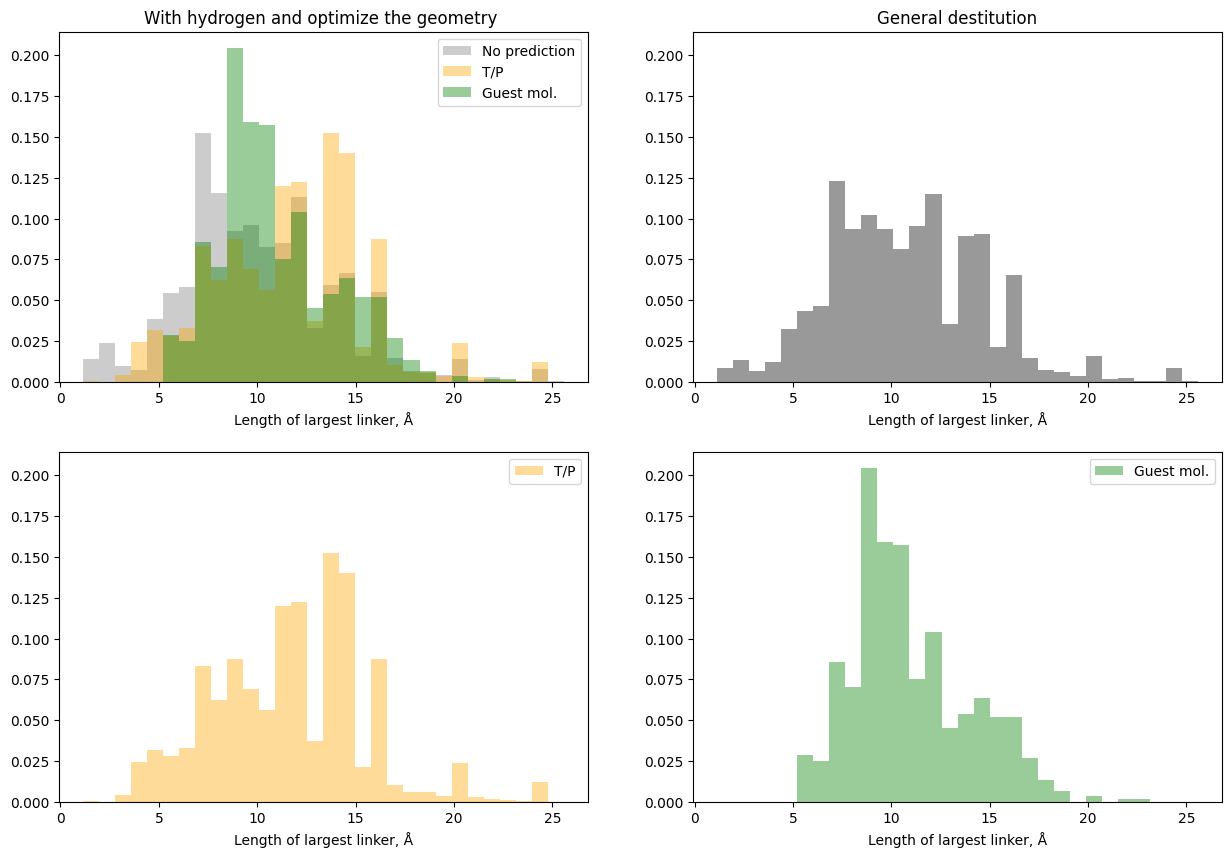

In [14]:
import matplotlib.pyplot as plt


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

x1, bins, patch = ax1.hist(no_lengths.values[:, 0], density=True, bins = 30, alpha=0.4, label="No prediction", color='gray')
ax1.hist(tp_lengths.values[:, 0],bins = bins, density=True, alpha=0.4, label="T/P", color='orange')
ax1.hist(gm_lengths.values[:, 0],bins = bins, density=True, alpha=0.4, label="Guest mol.", color='green')
ax1.set_title("With hydrogen and optimize the geometry ")
ax1.set_xlabel("Length of largest linker, Å")
ax1.legend()

ax2.hist(np.concatenate([no_lengths.values[:, 0], tp_lengths.values[:, 0], gm_lengths.values[:, 0]]),bins = bins, density=True, alpha=0.4, color='black')
ax2.set_title("General destitution")
ax2.set_xlabel("Length of largest linker, Å")
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlim(ax1.get_xlim())


ax3.hist(tp_lengths.values[:, 0], label="T/P",bins = bins, density=True, alpha=0.4, color='orange')
# ax3.set_title("T/P")
ax3.set_xlabel("Length of largest linker, Å")
ax3.set_ylim(ax1.get_ylim())
ax3.set_xlim(ax1.get_xlim())
ax3.legend()


ax4.hist(gm_lengths.values[:, 0], label="Guest mol.",bins = bins, density=True, alpha=0.4, color='green')
# ax4.set_title("guest mol.")
ax4.set_xlabel("Length of largest linker, Å")
ax4.set_ylim(ax1.get_ylim())
ax4.set_xlim(ax1.get_xlim())
ax4.legend()


In [15]:
stats = pd.DataFrame(columns=["Mean", "Std", "Mode", "Dev", "Median", "Q1", "Q2", "Q3"])

print("T/P QMOF")
stats.loc["T/P QMOF"] = get_statistics(tp_lengths.values[:, 0])

print("Guest mol. QMOF")
stats.loc["Guest mol. QMOF"] = get_statistics(gm_lengths.values[:, 0])

print("No prediction QMOF")
stats.loc["No prediction QMOF"] = get_statistics(no_lengths.values[:, 0])

print("General distribution QMOF")
stats.loc["General distribution QMOF"] = get_statistics(np.concatenate([no_lengths.values[:, 0], tp_lengths.values[:, 0], gm_lengths.values[:, 0]]))

T/P QMOF
	Mean (+- std): 11.73 (+- 3.78) Å
	Mode: 12.04 (+- 0.64) Å
	Median: 11.84 Å
	Quantiles:
	25% - 9.17 Å
	50% - 11.84 Å
	75% - 14.19 Å
Guest mol. QMOF
	Mean (+- std): 11.06 (+- 3.07) Å
	Mode: 9.10 (+- 0.75) Å
	Median: 10.29 Å
	Quantiles:
	25% - 9.18 Å
	50% - 10.29 Å
	75% - 12.97 Å
No prediction QMOF
	Mean (+- std): 10.15 (+- 3.91) Å
	Mode: 7.87 (+- 0.61) Å
	Median: 9.76 Å
	Quantiles:
	25% - 7.52 Å
	50% - 9.76 Å
	75% - 12.44 Å
General distribution QMOF
	Mean (+- std): 10.76 (+- 3.86) Å
	Mode: 12.24 (+- 0.85) Å
	Median: 10.45 Å
	Quantiles:
	25% - 7.90 Å
	50% - 10.45 Å
	75% - 13.65 Å


(-0.06350360648502562, 26.790872032700253)

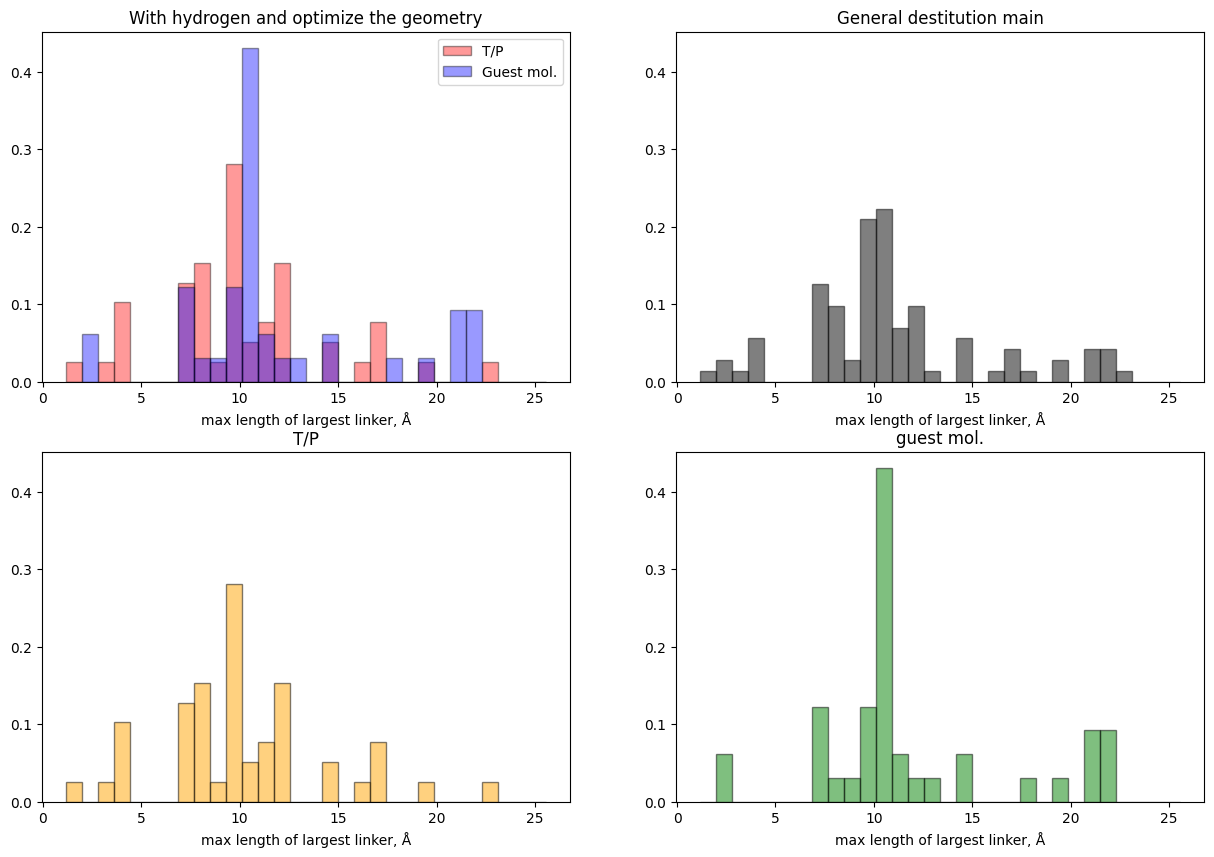

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# x1, bins, patch = ax1.hist(main_lengths.max_length.values, density=True, bins = 30, alpha=0.4, label="no prediction", color='gray')
ax1.hist(main_lengths.max_length.loc[main_lengths.target == 1].values, bins = bins, density=True, alpha=0.4, label="T/P", color='red', edgecolor="black", stacked=True)
ax1.hist(main_lengths.max_length.loc[main_lengths.target == 0].values,bins = bins, density=True, alpha=0.4, label="Guest mol.", color='blue', edgecolor="black", stacked=True)
ax1.set_title("With hydrogen and optimize the geometry")
ax1.set_xlabel("max length of largest linker, Å")
ax1.legend()

ax2.hist(main_lengths.max_length.values,bins = bins, density=True, alpha=0.5, color='black', edgecolor="black", stacked=True)
ax2.set_title("General destitution main")
ax2.set_xlabel("max length of largest linker, Å")
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlim(ax1.get_xlim())


ax3.hist(main_lengths.max_length.loc[main_lengths.target == 1],bins = bins, density=True, alpha=0.5, color='orange', edgecolor="black")
ax3.set_title("T/P")
ax3.set_xlabel("max length of largest linker, Å")
ax3.set_ylim(ax1.get_ylim())
ax3.set_xlim(ax1.get_xlim())


ax4.hist(main_lengths.max_length.loc[main_lengths.target == 0],bins = bins, density=True, alpha=0.5, color='green', edgecolor="black")
ax4.set_title("guest mol.")
ax4.set_xlabel("max length of largest linker, Å")
ax4.set_ylim(ax1.get_ylim())
ax4.set_xlim(ax1.get_xlim())

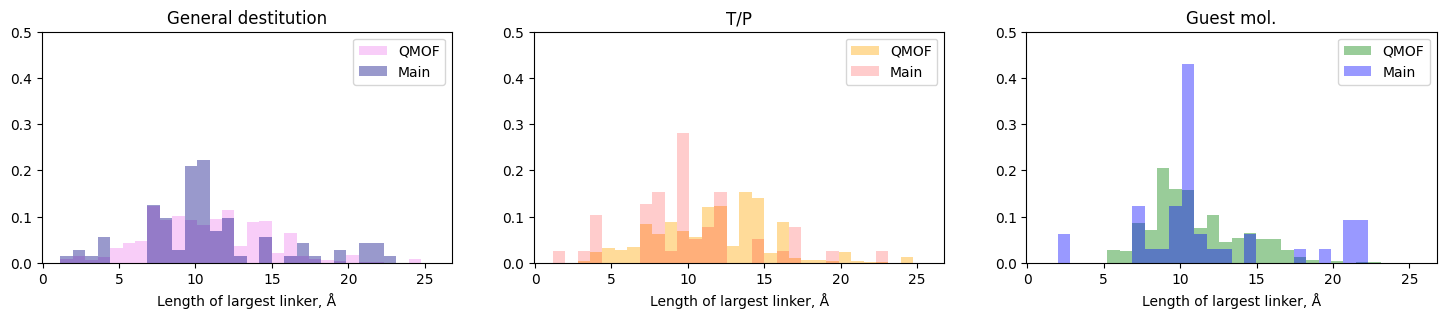

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 3))


ax1.hist(np.concatenate([no_lengths.values[:, 0], tp_lengths.values[:, 0], gm_lengths.values[:, 0]]),bins = bins, density=True, alpha=0.4, color='violet', label="QMOF")

ax1.hist(main_lengths.max_length.values,bins = bins, density=True, alpha=0.4, color='navy', label="Main")

ax1.set_title("General destitution")
ax1.set_xlabel("Length of largest linker, Å")
ax1.set_ylim(0, 0.5)
# ax1.set_xlim()

ax1.legend()


ax2.hist(tp_lengths.values[:, 0],bins = bins, density=True, alpha=0.4, color='orange', label="QMOF")
ax2.hist(main_lengths.max_length.loc[main_lengths.target == 1],bins = bins, density=True, alpha=0.2, color='red', label="Main")

ax2.set_title("T/P")
ax2.set_xlabel("Length of largest linker, Å")
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlim(ax1.get_xlim())
ax2.legend()

ax3.hist(gm_lengths.values[:, 0],bins = bins, density=True, alpha=0.4, color='green', label="QMOF")
ax3.hist(main_lengths.max_length.loc[main_lengths.target == 0],bins = bins, density=True, alpha=0.4, color='blue', label="Main")
ax3.set_title("Guest mol.")
ax3.set_xlabel("Length of largest linker, Å")
ax3.set_ylim(ax1.get_ylim())
ax3.set_xlim(ax1.get_xlim())
ax3.legend()


In [23]:
print("T/P Main")
stats.loc["T/P Main"] = get_statistics(main_lengths.max_length.loc[main_lengths.target == 1])

print("Guest mol. Main")
stats.loc["Guest mol. Main"] = get_statistics(main_lengths.max_length.loc[main_lengths.target == 0])

print("General distribution Main")
stats.loc["General distribution Main"] = get_statistics(main_lengths.max_length)

T/P Main
	Mean (+- std): 10.22 (+- 4.09) Å
	Mode: 10.26 (+- 0.53) Å
	Median: 9.90 Å
	Quantiles:
	25% - 7.90 Å
	50% - 9.90 Å
	75% - 11.84 Å
Guest mol. Main
	Mean (+- std): 11.99 (+- 4.95) Å
	Mode: 10.48 (+- 0.48) Å
	Median: 10.61 Å
	Quantiles:
	25% - 9.88 Å
	50% - 10.61 Å
	75% - 13.56 Å
General distribution Main
	Mean (+- std): 11.02 (+- 4.59) Å
	Mode: 10.26 (+- 0.53) Å
	Median: 10.42 Å
	Quantiles:
	25% - 8.13 Å
	50% - 10.42 Å
	75% - 12.05 Å


In [24]:
stats

,Mean,Std,Mode,Dev,Median,Q1,Q2,Q3
T/P QMOF,11.726054,3.780582,12.036684,0.639973,11.838413,9.174579,11.838413,14.194942
Guest mol. QMOF,11.063716,3.067774,9.099837,0.747363,10.285349,9.180135,10.285349,12.974688
No prediction QMOF,10.154118,3.905361,7.870744,0.610327,9.760739,7.522134,9.760739,12.440278
General distribution QMOF,10.760813,3.856105,12.239777,0.852510,10.447454,7.901227,10.447454,13.652539
T/P Main,10.216373,4.090409,10.261215,0.531868,9.895432,7.901232,9.895432,11.838268
Guest mol. Main,11.992954,4.949351,10.482677,0.484348,10.611480,9.877649,10.611480,13.562840
General distribution Main,11.023910,4.587304,10.261215,0.531868,10.422844,8.132855,10.422844,12.052520
